In [1]:
import gym
from gym import spaces
import numpy as np
from numpy import random
import seaborn
import time
import matplotlib.pyplot as plt
import time

# PART I: Define the Environment

The environment that we defined is called "GameEnv". It is a 4x4 grid world where the agent moves around to collect rewards, avoid traps, and reach the goal to collect a final reward.

**Actions**

The agent has 4 possible actions:

- Move right
- Move left
- Move up
- Move down

**States**

The states are represented by a 4x4 grid where each cell can have one of the following values:

+ 1 if the agent is present in that cell
+ 0.8 if the cell contains the target goal position
+ 0.6 if the cell contains the +5 gold coin
+ 0.4 if the cell contains the +4 gold coin
+ 0.2 if the cell contains the -7 trap
+ 0.1 if the cell contains the -6 trap

**Rewards**

The agent receives different rewards based on the state it moves to after taking an action:

- +20 if the agent reaches the target goal position
- +5 or +4 if the agent reaches the respective gold coins
- -7 or -6 if the agent enters the respective trap

**Objective**

The main objective of the agent is to navigate through the grid world and reach the target goal position while collecting the largest possible reward.


In [2]:
class GameEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, timestep):
        self.action_space = spaces.Discrete(4) 
        self.observation_space = spaces.Discrete(16)  
        self.max_timesteps = timestep
        
        
    def step(self, action):

        #self.state = np.random.choice(self.observation_space.n)
        done = False # initialize done to False
        if action == 0:
            self.agent_pos[0] += 1  #down
        if action == 1:
            self.agent_pos[0] -= 1  #up
        if action == 2:
            self.agent_pos[1] += 1  #right
        if action == 3:
            self.agent_pos[1] -= 1  #left

        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))     
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.coin1_pos)] = 0.6
        self.state[tuple(self.coin2_pos)] = 0.5
        self.state[tuple(self.trap1_pos)] = 0.2
        self.state[tuple(self.trap2_pos)] = 0.1
        self.state[tuple(self.agent_pos)] = 1.0
        observation = self.state.flatten()
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 20 #Target position: Given big reward if it reaches target
            done = True   #stops the agent from continuing to move (terminal state)

        elif (self.agent_pos == self.trap1_pos).all():
            reward = -7 #A negative reward of -7 if it enters trap

        elif (self.agent_pos == self.trap2_pos).all():
            reward = -6 #A negative reward of -6 if it enters trap
            
        elif (self.agent_pos == self.coin1_pos).all():
            reward = +5 #Reward of +5
            self.coin1_pos = [-1,-1]  #removes the coin once collected

        elif (self.agent_pos == self.coin2_pos).all():
            reward = +4 #Reward of +4
            self.coin2_pos = [-1,-1]  #removes the coin once collected

            
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
            done = True
        info = {}
        return observation, reward, done, info
    


    def reset(self):
        
        self.timestep = 0
        self.state = np.zeros((4,4))
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]       
        self.trap1_pos = [2,0]
        self.trap2_pos = [2,3]
        self.coin1_pos = [1,1]
        self.coin2_pos = [1,3] 

        
        self.state[tuple(self.agent_pos)] = 1.0
        self.state[tuple(self.goal_pos)] = 0.8
        self.state[tuple(self.coin1_pos)] = 0.6
        self.state[tuple(self.coin2_pos)] = 0.4
        self.state[tuple(self.trap1_pos)] = 0.2
        self.state[tuple(self.trap2_pos)] = 0.1
        observation = self.state.flatten()
        return observation

    def render(self):
        plt.imshow(self.state)
       

In [3]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space
    
    def step(self, observation):
        return np.random.choice(self.action_space.n)

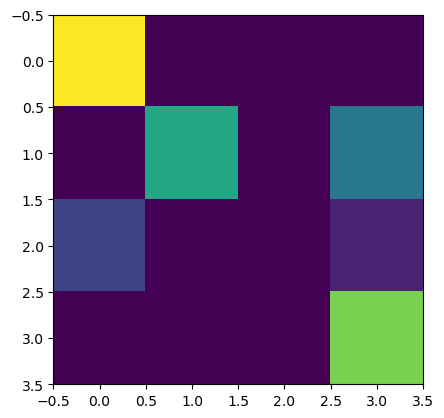

In [4]:
envview = GameEnv(5)
envview.reset()
envview.render()

Step 1
Current state:
 [[1.  0.  0.  0. ]
 [0.  0.6 0.  0.4]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Chosen action:  0 (Down)
New state:
 [[0.  0.  0.  0. ]
 [1.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Reward:  0 

Step 2
Current state:
 [[0.  0.  0.  0. ]
 [1.  0.6 0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Chosen action:  2 (Right)
New state:
 [[0.  0.  0.  0. ]
 [0.  1.  0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Reward:  5 

Step 3
Current state:
 [[0.  0.  0.  0. ]
 [0.  1.  0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.8]]
Chosen action:  0 (Down)
New state:
 [[0.  0.  0.  0. ]
 [0.  0.  0.  0.5]
 [0.2 1.  0.  0.1]
 [0.  0.  0.  0.6]]
Reward:  0 

Step 4
Current state:
 [[0.  0.  0.  0. ]
 [0.  0.  0.  0.5]
 [0.2 1.  0.  0.1]
 [0.  0.  0.  0.6]]
Chosen action:  1 (Up)
New state:
 [[0.  0.  0.  0. ]
 [0.  1.  0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0.  0.6]]
Reward:  0 

Step 5
Current state:
 [[0.  0.  0.  0. ]
 [0.  1.  0.  0.5]
 [0.2 0.  0.  0.1]
 [0.  0.  0. 

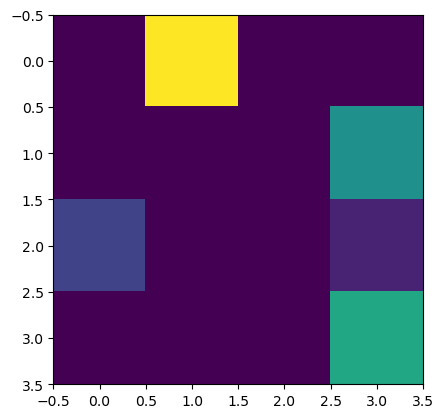

In [5]:
#Test the environment is working
timestep=10

envtest = GameEnv(timestep)
envtest.reset()

agent = RandomAgent(envtest)

obs = envtest.reset()
done = False
step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

rwd=0
step=0
while not done:
    step=step+1
    print("Step",step)
    action = agent.step(obs)
    print("Current state:\n", envtest.state)
    print("Chosen action: ", action, step_labels[action])
    observation, reward, done, info = envtest.step(action)
    rwd+=reward
    print("New state:\n", envtest.state)
    print("Reward: ", reward,'\n')
    envtest.render()
if(envtest.agent_pos == envtest.goal_pos).all():
    print("Terminal state reached!")
print("Total Reward:", rwd)


# PART 2 Step 1: Implementating SARSA

In [6]:
## functions ##

#Define epsilon-greedy function
def greedyEp(state, Q, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        act = np.random.choice(env.action_space.n)
    else:
        act = np.argmax(Q[np.where(state==1)[0][0]][:])
    return act


#Define SARSA
def SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay):
    
    #define parameters to track reward, loss, average steps for plots
    total_reward =[]
    s_a_loss=[]
    step_count=0
    avg_steps=[]
    step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}


    #Initializing the Q table
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    old_Q = Q
    
    for episode in range(total_episodes):
        ep_reward=0
        step=0
        avg_loss=0
        state = env.reset()
        done=False

        while not done:
            step=step+1
            action = greedyEp(state, Q, epsilon)
            next_state, reward, done, info= env.step(action)

            #Choosing the next action
            next_action = greedyEp(next_state, Q, epsilon)

            #Calculating new Q value at this state-action pair
            prediction = Q[np.where(state==1)[0][0]][action]
            target = reward + gamma * Q[np.where(next_state==1)[0][0]][next_action]
            loss=alpha*(target - prediction)
            avg_loss += loss
            Q[np.where(state==1)[0][0]][action] = (Q[np.where(state==1)[0][0]][action] + loss)
            state = next_state
            action = next_action

            #Tracking reward
            ep_reward = ep_reward + reward

            #Decrease epsilon using negative exponential function
            if epsilon > 0.01:
                epsilon =np.exp(-decay*(episode+1))

        #track data for plots
        step_count += step
        total_reward.append(ep_reward)
        s_a_loss.append(avg_loss/timestep)
        
        #print current Q-table every 100 episodes
        if (episode%100==99):
            avg_steps.append(step_count/100)
            step_count=0
            print("Episode",episode+1,"/",total_episodes,"complete")
            print("Current Q-table:\n", Q,"\n")
    
    #When all episodes are complete
    print("Done!")
    return Q, total_reward, s_a_loss, avg_steps

In [7]:
#define parameters
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)
print(decay)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running SARSA
Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

0.003070113457325394
Episode 100 / 2000 complete
Current Q-table:
 [[-4.44703602e-01  1.93615214e-01  8.42804980e-01  2.01432300e-01]
 [ 2.01599760e+00  9.35192679e-01  2.17177298e-01  1.61570970e-01]
 [ 8.39357593e-01  1.69528028e-01  1.34700178e-01  5.74713217e-01]
 [ 6.67892848e-01  4.03774948e-02  1.25494975e-01  1.23447793e-01]
 [-6.97166331e+00  2.29350479e-01  2.50739898e+00 -6.98220012e-02]
 [-2.70957250e-01  1.01004185e+00  1.15113896e+00 -5.05197883e-01]
 [ 2.83954837e-01  2.76444282e-01  1.64973476e+00  6.82428046e-01]
 [-2.87233267e+00  8.56427484e-02 -1.19609781e-01  7.83949336e-01]
 [-8.35123557e-01 -4.74025318e-01 -5.58473741e-01 -6.52461519e+00]
 [ 6.47057396e-02  6.94251443e-01  1.03107031e-01 -5.61552504e+00]
 [ 3.09939588e+00  5.42977226e-01 -7.43793333e-01 -2.41038679e-01]
 [ 1.31887675e+01  4.32138085e-01 -8.66658295e-01  9.66727472e-02]
 [-4.27424228e-01 -4.18186238e+00  1.44772805e-01 -6.40810684e-01]
 [ 4.20328493e-03 -4.16478236e-02  2.28383320e+00 -1.75283937e

Episode 1000 / 2000 complete
Current Q-table:
 [[ 6.80300619e+00  6.19453939e+00  1.45877986e+01  7.34163075e+00]
 [ 1.70352908e+01  1.00675886e+01  6.50310101e+00  8.89262202e+00]
 [ 1.18292725e+01  2.00319271e+00  7.34923536e-01  2.08193576e+00]
 [ 3.49482096e+00  5.08187754e-01  3.69255260e-01  3.69474227e-01]
 [-7.46956124e+00  1.46021842e+00  1.20475513e+01  2.00351025e+00]
 [ 7.55340100e+00  1.05146003e+01  1.36140823e+01  6.06170290e+00]
 [ 1.52947213e+01  6.67020767e+00  9.76766689e+00  8.14153243e+00]
 [ 4.12236836e+00  7.50484160e-01  5.89618143e-01  1.09756911e+01]
 [-5.17688840e-01  3.43201990e+00  1.16117955e-01 -6.94491165e+00]
 [ 3.21310438e+00  2.28169606e+00  1.37617055e+01 -6.66642502e+00]
 [ 1.79904446e+01  1.07508269e+01  7.59949848e+00  6.34278051e+00]
 [ 1.97018975e+01  3.15336185e+00  4.24854703e+00  3.36423296e+00]
 [-3.65294210e-01 -5.08020644e+00  4.18876814e+00 -7.90469750e-01]
 [ 1.87706305e+00  1.18883374e-02  1.59064690e+01  6.44896855e-01]
 [ 1.45726117e+

Episode 1800 / 2000 complete
Current Q-table:
 [[ 7.41154980e+00  6.86497932e+00  1.62114493e+01  8.35029899e+00]
 [ 1.80396129e+01  1.08477848e+01  6.71894006e+00  9.80199451e+00]
 [ 1.21224016e+01  2.00319271e+00  7.34923536e-01  2.08193576e+00]
 [ 3.49482096e+00  5.08187754e-01  3.69255260e-01  3.69474227e-01]
 [-7.46956124e+00  1.46021842e+00  1.27906195e+01  2.00351025e+00]
 [ 8.69193444e+00  1.10687679e+01  1.43811014e+01  6.81818887e+00]
 [ 1.61168715e+01  7.06168005e+00  1.09301123e+01  8.23216617e+00]
 [ 4.50350606e+00  7.50484160e-01  5.89618143e-01  1.17483018e+01]
 [-5.17688840e-01  3.43201990e+00  1.16117955e-01 -6.94491165e+00]
 [ 3.21310438e+00  2.28169606e+00  1.42757267e+01 -6.66642502e+00]
 [ 1.78864261e+01  1.15754028e+01  8.19201062e+00  6.34278051e+00]
 [ 1.97571936e+01  3.15336185e+00  4.24854703e+00  3.36423296e+00]
 [-3.65294210e-01 -5.08020644e+00  4.18876814e+00 -7.90469750e-01]
 [ 1.87706305e+00  1.18883374e-02  1.62050589e+01  6.44896855e-01]
 [ 1.45726117e+

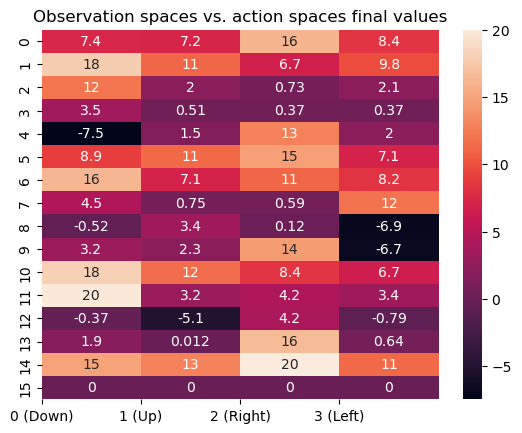

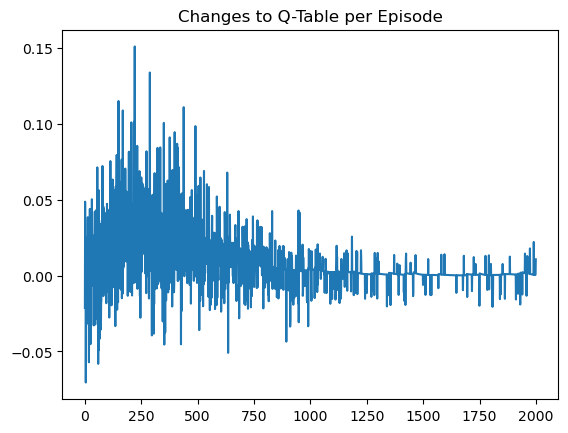

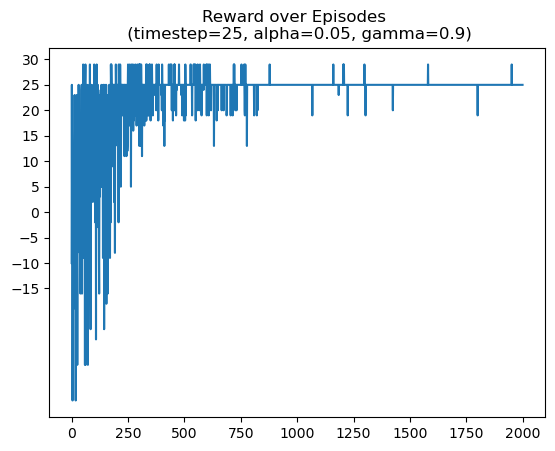

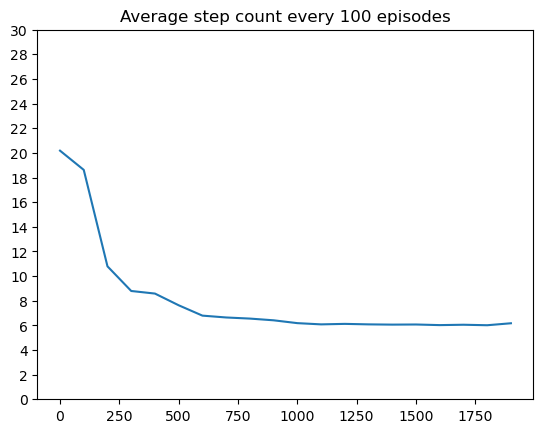

In [8]:
#action_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

plt.plot(loss)
plt.title("Changes to Q-Table per Episode")
plt.show()

plt.plot(reward)
plt.title(f'Reward over Episodes \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
plt.yticks(np.arange(-15, 35, step=5))
plt.show()

xticks=np.arange(0,total_episodes, 100)
plt.plot(xticks, avg_step)
plt.title("Average step count every 100 episodes")
plt.yticks(np.arange(0, 31, step=2))
plt.show()

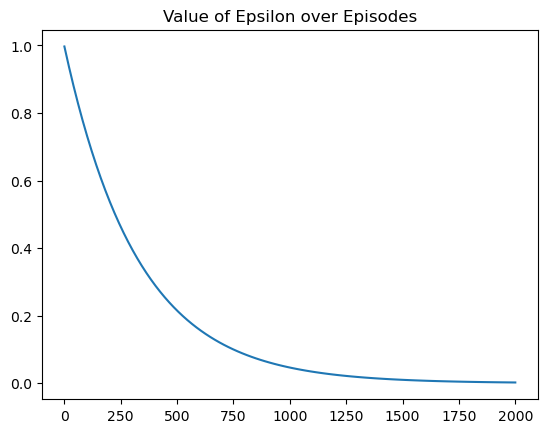

In [9]:
x = np.linspace(1,2000,100)
decay=-np.log(0.01)/(2000*0.75)
plt.plot(x,np.exp(-decay*(x)))
plt.title("Value of Epsilon over Episodes")
plt.show()

In [10]:
#Evaluation function to test that policy has converged     

def evaluate(env, Q, timestep, total_episodes, epsilon):
    tot_r = []
    tot_s = []
    for episode in range(total_episodes):
        ep_reward=0
        step=0
        state = env.reset()
        done=False

        while not done:
            step=step+1
            action = greedyEp(state, Q, epsilon)
            next_state, reward, done, info= env.step(action)

            #Choosing the next action
            next_action = greedyEp(next_state, Q, epsilon)

            state = next_state
            action = next_action

            #Tracking reward
            ep_reward = ep_reward + reward


        tot_s.append(step)
        tot_r.append(ep_reward)
  
    #When all episodes are complete
    print("Done!")
    return tot_r, tot_s

Done!


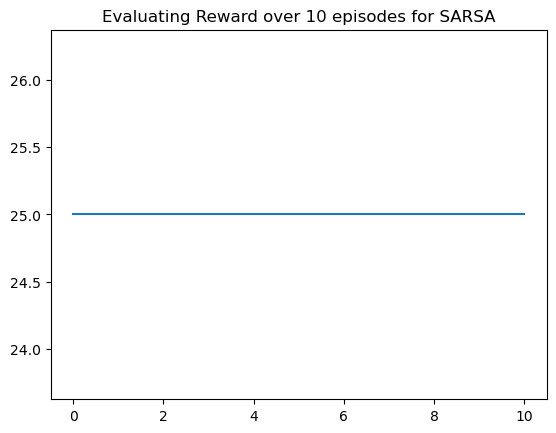

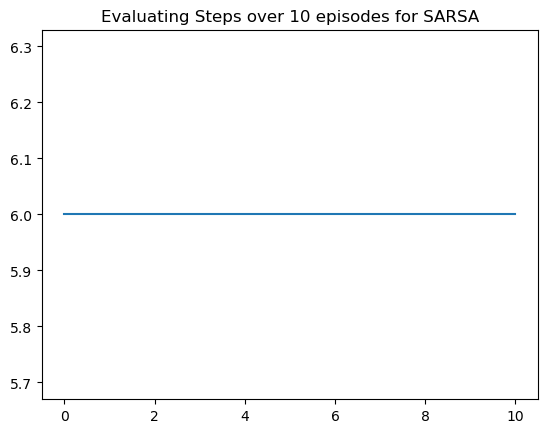

In [11]:
Qpi = Q
timestep=25
total_episodes = 11
epsilon = 0 #ensures greedy action is taken 100% of the time

step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

env = GameEnv(timestep)
env.reset()

reward, steps = evaluate(env, Qpi, timestep, total_episodes, epsilon)

plt.plot(reward)
plt.title(f'Evaluating Reward over 10 episodes for SARSA')
plt.show()
plt.plot(steps)
plt.title("Evaluating Steps over 10 episodes for SARSA")
plt.show()

# PART 2 Step 2: Parameter Tuning for SARSA

**Parameter #1: Number of Max Timesteps**

Default in base SARSA algorithm was 25 timesteps. Decreasing the timesteps will improve runtime; we will see if we can still maintain good convergence while lowering the max timestep. 

In [12]:
#Max Timesteps: 20 timesteps

#define parameters
timestep=20
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1
#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[-2.58913669e-01  4.59935606e-01  1.18084079e+00  3.75044845e-01]
 [ 1.83591278e+00  9.54296998e-01  3.81361704e-01  3.83849240e-01]
 [ 5.66325894e-01  1.79565601e-01  1.47661391e-01  1.00430391e+00]
 [ 1.08846010e+00  7.55928640e-02  1.59894586e-02  1.49163534e-01]
 [-5.84269624e+00  3.32692650e-01  2.37121188e+00 -3.68969393e-01]
 [-4.40601369e-01  1.09662200e+00  8.09439608e-01 -9.69176806e-01]
 [ 2.57673468e-01  1.54173749e-01  2.19298525e+00  1.32824122e+00]
 [-1.12998004e+00  2.76458246e-01  2.76679453e-02  5.86096087e-01]
 [-9.22029284e-02 -4.35499170e-02 -6.88417876e-01 -4.25888202e+00]
 [ 2.04397018e-01  5.46106206e-01  1.70692875e-01 -5.30345345e+00]
 [ 2.21320919e+00  1.14787080e-01 -2.27596430e+00  1.71901889e-03]
 [ 1.11974666e+01  5.55915986e-01 -1.60443192e-01 -6.73942377e-02]
 [-2.60644058e-02 -4.08222851e+00  3.99359546e-01 -1.93599570e-01]
 [ 1.26754677e-01 -9.83229954e-02  2.68794972e+00 -2.02998024e-01]
 [ 1.50363398e+0

Episode 1000 / 2000 complete
Current Q-table:
 [[ 4.99908961  5.81728836 13.53864858  5.58153805]
 [15.79581539  8.82091818  4.66847999  7.66676026]
 [ 2.21263842  1.11864711  1.31190992 10.87245639]
 [ 6.82272093  1.12381601  0.58908528  0.72184484]
 [-7.30195191  2.12270237 11.33299458  1.94823313]
 [ 4.40865431  8.58936723 12.69400651  5.57380505]
 [10.97921272  4.89927318 14.26449888  5.96602886]
 [11.10221608  3.09735786  7.8265476   8.18675862]
 [-0.5542879   0.92305407 -0.50258671 -5.5465039 ]
 [ 7.94677644  1.63473626  2.56153471 -6.43916422]
 [16.16733428  1.84778593  0.06277436  0.72201253]
 [20.          5.73768     8.0230806  11.23217303]
 [-0.19024387 -5.16109216  1.83578815 -0.12423902]
 [ 2.42412158  0.87000251 13.61755297 -0.22201726]
 [10.00532121  4.2312851  19.9933025   4.19093853]
 [ 0.          0.          0.          0.        ]] 

Episode 1100 / 2000 complete
Current Q-table:
 [[ 5.2587352   6.16147719 14.3336441   5.58153805]
 [16.36184562  8.82091818  5.1827678

Episode 2000 / 2000 complete
Current Q-table:
 [[ 6.02908904  6.52936365 15.01264928  7.0218178 ]
 [16.70311022 10.23588025  6.21446445  8.24563273]
 [ 2.21263842  1.11864711  1.31190992 12.58087376]
 [ 7.70582446  1.12381601  0.58908528  0.72184484]
 [-7.30195191  2.12270237 12.30279085  1.94823313]
 [ 5.4216818   9.4676993  13.31502295  6.48659594]
 [11.51498678  6.18869452 14.79844677  7.25212917]
 [11.99977654  3.86368336  8.11621756  8.43588763]
 [-0.5542879   0.92305407 -0.50258671 -5.5465039 ]
 [ 9.42148106  1.63473626  2.56153471 -6.43916422]
 [16.5809539   1.84778593  0.06277436  0.72201253]
 [20.          6.22851383  8.76077429 11.56764413]
 [-0.19024387 -5.16109216  1.83578815 -0.12423902]
 [ 2.42412158  0.87000251 14.93813991 -0.22201726]
 [10.40482194  4.2312851  19.99638094  4.19093853]
 [ 0.          0.          0.          0.        ]] 

Done!


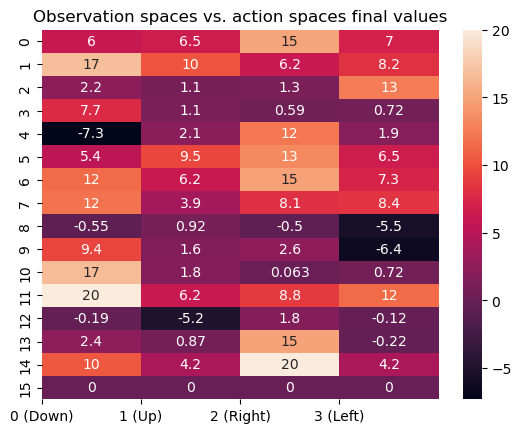

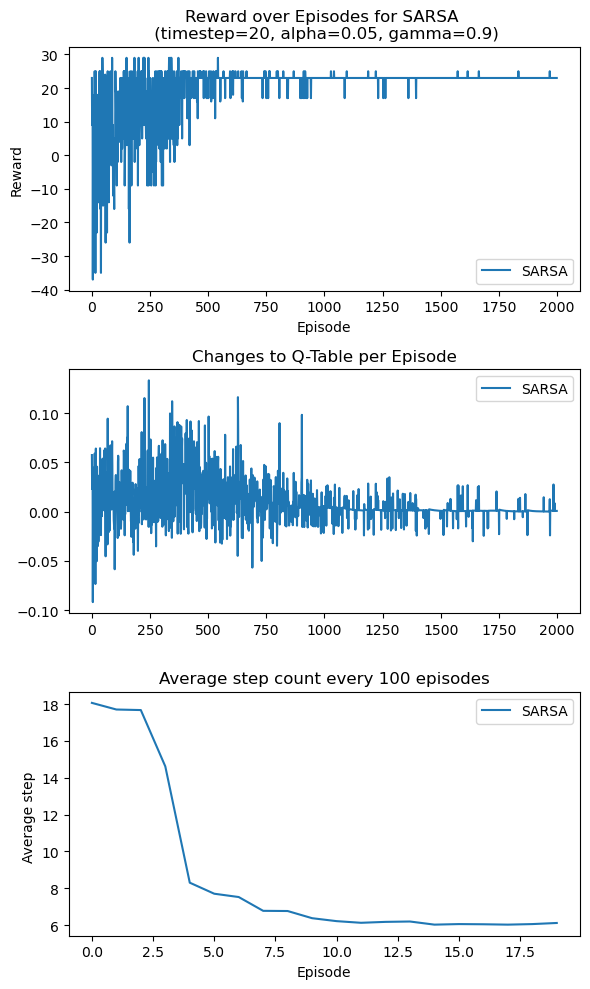

In [14]:
seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward, label='SARSA')
axs[0].set_title(f'Reward over Episodes for SARSA \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss, label='SARSA')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step, label='SARSA')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

In [15]:
#Max Timesteps: 15

#define parameters
timestep=15
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1
#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[-2.25785943e-01  3.34105480e-01  1.14269584e+00  3.70981377e-01]
 [ 2.10709042e+00  1.19218971e+00  3.62626613e-01  4.02734561e-01]
 [ 3.57118017e-01  1.35676182e-01  4.76669529e-02  1.03796500e+00]
 [ 7.11135988e-01  2.20713409e-02  8.75997846e-02  6.52205641e-02]
 [-6.12294534e+00  2.26693073e-01  3.31359786e+00 -1.02497861e-01]
 [-1.84080959e-01  1.19009472e+00  3.32195550e-01 -1.68742179e-02]
 [ 7.21477863e-02  8.28482441e-02  2.16178644e+00  9.21364144e-01]
 [-1.53369725e+00  3.71658535e-02 -2.75035872e-02  5.11419019e-01]
 [-1.80481451e-01  4.70696609e-01  1.53759529e-02 -4.66875922e+00]
 [ 1.59630375e-02  4.73117222e-01 -8.86806787e-03 -2.80101228e+00]
 [ 1.00485494e+00  1.82269299e-01 -1.26906608e+00 -1.12239371e-01]
 [ 6.03325408e+00  3.76135127e-01 -8.39538750e-01  4.22358183e-02]
 [-3.65755592e-02 -1.83607948e+00  4.53603534e-02 -9.83557513e-02]
 [ 6.57458530e-05 -6.29689434e-02  4.81181627e-01 -5.70886791e-02]
 [ 9.53560263e-0

Episode 1000 / 2000 complete
Current Q-table:
 [[ 4.72689021e+00  7.38219574e+00  1.47702220e+01  5.20313635e+00]
 [ 1.69519108e+01  8.01980051e+00  3.62699383e+00  5.58110168e+00]
 [ 1.26079976e+00  9.95529336e-01  5.31653070e-01  8.47525208e+00]
 [ 2.12720864e+00  3.38065570e-01  4.78314601e-01  3.48129817e-01]
 [-6.31458626e+00  1.95534757e+00  1.16667805e+01  8.78400179e-01]
 [ 1.33696909e+01  7.65828400e+00  3.43516063e+00  4.77818010e+00]
 [ 7.18956292e+00  1.17493193e+00  2.88849145e+00  2.43935018e+00]
 [-9.89684019e-02  7.58531775e-01  9.36790484e-01  2.23258484e+00]
 [-1.27377295e-02  5.71043382e+00 -7.26831111e-02 -4.94678677e+00]
 [ 1.50975987e+01  5.24092714e+00  7.70493201e+00 -4.46416292e+00]
 [ 1.65397894e+01  5.01124299e-01  6.71908184e-01  1.68595431e+00]
 [ 1.57072247e+01  3.72424983e-01 -8.39538750e-01  3.51501912e-01]
 [ 8.76475804e-01 -2.51972108e+00  1.09539408e+01  4.49593442e-01]
 [ 1.06073506e+01  8.12269450e+00  1.71826548e+01  4.58237827e+00]
 [ 1.04496437e+

Episode 1900 / 2000 complete
Current Q-table:
 [[ 4.72689021e+00  8.55015393e+00  1.59554234e+01  7.26419819e+00]
 [ 1.76795817e+01  8.41236727e+00  4.19195985e+00  7.19311204e+00]
 [ 1.26079976e+00  9.95529336e-01  5.31653070e-01  8.95030449e+00]
 [ 2.12720864e+00  3.38065570e-01  4.78314601e-01  3.48129817e-01]
 [-6.31458626e+00  1.95534757e+00  1.20417584e+01  8.78400179e-01]
 [ 1.42295698e+01  7.65828400e+00  3.43516063e+00  5.85844907e+00]
 [ 7.18956292e+00  1.17493193e+00  2.88849145e+00  2.43935018e+00]
 [-9.89684019e-02  7.58531775e-01  9.36790484e-01  2.23258484e+00]
 [-1.27377295e-02  7.02615696e+00 -7.26831111e-02 -4.94678677e+00]
 [ 1.60751909e+01  7.15480739e+00  8.74456295e+00 -3.62938892e+00]
 [ 1.68701169e+01  5.01124299e-01  6.71908184e-01  1.68595431e+00]
 [ 1.57072247e+01  3.72424983e-01 -8.39538750e-01  3.51501912e-01]
 [ 8.76475804e-01 -2.51972108e+00  1.23358574e+01  4.49593442e-01]
 [ 1.16237491e+01  8.12269450e+00  1.79999973e+01  6.13379475e+00]
 [ 1.15265132e+

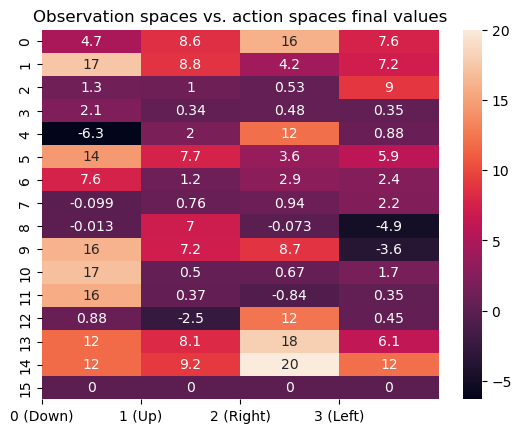

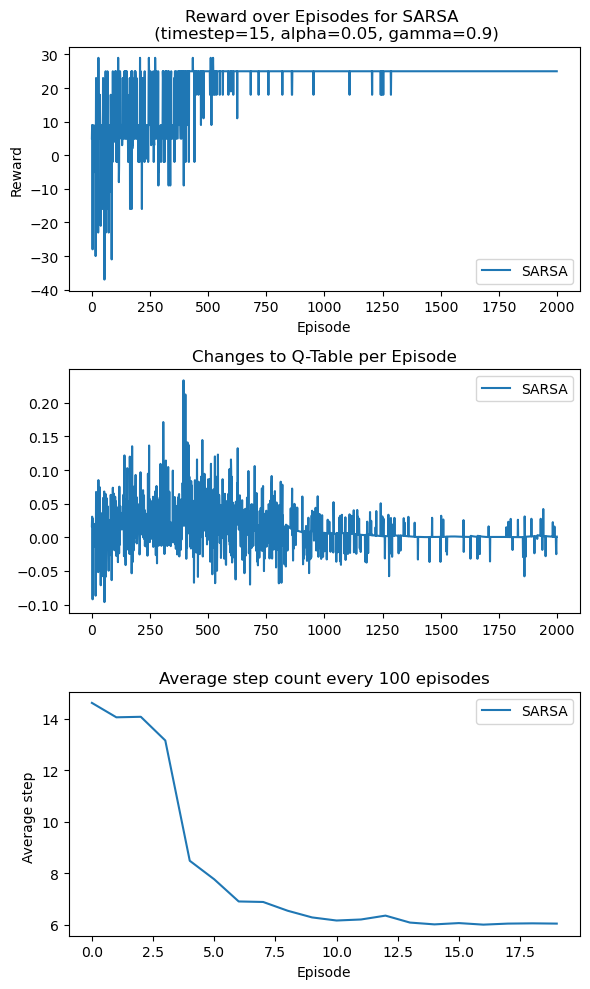

In [16]:
seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward, label='SARSA')
axs[0].set_title(f'Reward over Episodes for SARSA \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss, label='SARSA')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step, label='SARSA')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

In [17]:
#Max Timesteps: 10 timesteps

#define parameters
timestep=10
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1
#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 2.29863661e-01  3.45983956e-01  9.32447136e-01  2.78538513e-01]
 [ 3.38687575e+00  1.64974778e+00  8.89806694e-02  3.14364275e-01]
 [ 6.65574722e-02  8.46863699e-03  1.85125685e-01  5.45518977e-01]
 [ 1.13696509e+00  2.68958026e-02  6.87999719e-02  3.42588781e-03]
 [-5.32054804e+00  1.63978017e-01  2.98992337e+00 -1.78912870e-01]
 [-2.13358714e-01  1.47167676e+00  2.90486590e-01  6.82769080e-03]
 [ 4.22186299e-02  2.95004171e-02  9.02212996e-01  9.87458986e-01]
 [-2.45570426e+00  9.00000000e-03 -1.69954815e-01  1.03711631e-01]
 [-1.02487169e-01  2.58108201e-01  3.10286248e-04 -2.95146572e+00]
 [ 3.84286291e-02  7.80719826e-02  6.99480857e-02 -3.29645310e+00]
 [ 1.14973375e+00  5.60786800e-04 -9.82462500e-01  9.91949403e-04]
 [ 2.85250000e+00  1.97536670e-01 -8.68539461e-01  4.15643929e-02]
 [-7.41869994e-04 -1.85537153e+00 -8.44811577e-03 -4.44776470e-04]
 [ 5.91337733e-03 -1.96428994e-04  3.12350674e-01 -9.91348950e-02]
 [ 0.00000000e+0

Episode 900 / 2000 complete
Current Q-table:
 [[ 3.43217226e+00  4.01912335e+00  1.24602210e+01  3.38386759e+00]
 [ 1.54018442e+01  4.85707523e+00  3.58839770e+00  5.03297391e+00]
 [ 1.41762694e+00  9.14668394e-01  4.99500195e-01  5.17692997e+00]
 [ 2.00808393e+00  1.80065307e-01  1.36904223e-01  4.72183048e-01]
 [-6.44978434e+00  1.49028295e+00  7.79984545e+00  1.31253176e+00]
 [ 1.17094342e+01  5.53188223e+00  3.42204396e+00  4.30713188e+00]
 [ 2.91119712e+00  1.16529282e+00  4.77188783e+00  2.16163029e+00]
 [-5.61743610e-01  7.45318040e-01  1.81288029e-01  3.74838619e+00]
 [-2.46989529e-01  2.37057952e+00  8.52475487e-01 -2.95146572e+00]
 [ 1.07758185e+00  2.58400133e+00  1.42579251e+01 -4.81796970e+00]
 [ 1.60175899e+01  1.04504405e+00  5.49760764e-01  2.45249889e+00]
 [ 1.41602195e+01  2.25639668e-01 -6.08003130e-01  9.12672670e-01]
 [-6.20412772e-03 -2.32263056e+00  2.42242411e-01 -7.16571062e-02]
 [ 1.91787161e-02  1.08644827e-02  5.53045291e+00 -1.70314061e-01]
 [ 6.06932176e+0

Episode 1800 / 2000 complete
Current Q-table:
 [[ 5.44365631e+00  4.81093820e+00  1.59997994e+01  6.66420347e+00]
 [ 1.78704041e+01  7.61662179e+00  3.90132044e+00  6.60690972e+00]
 [ 1.41762694e+00  9.14668394e-01  4.99500195e-01  6.98464509e+00]
 [ 2.00808393e+00  1.80065307e-01  1.36904223e-01  4.72183048e-01]
 [-6.44978434e+00  1.49028295e+00  1.21477312e+01  1.31253176e+00]
 [ 1.44787881e+01  7.97101771e+00  3.63993927e+00  5.80001070e+00]
 [ 2.91119712e+00  1.16529282e+00  4.68387197e+00  2.16163029e+00]
 [-1.58966110e-01  7.45318040e-01  1.81288029e-01  4.08609095e+00]
 [-2.46989529e-01  3.90521703e+00  8.52475487e-01 -2.95146572e+00]
 [ 1.96667743e+00  5.25065986e+00  1.61999733e+01 -4.69623565e+00]
 [ 1.79999976e+01  1.20752680e+00  2.37313717e+00  5.12285858e+00]
 [ 1.57072247e+01  2.25639668e-01 -6.08003130e-01  1.66976576e+00]
 [-6.20412772e-03 -2.32263056e+00  2.42242411e-01 -7.16571062e-02]
 [ 1.91787161e-02  7.37413252e-01  1.22229658e+01 -1.70314061e-01]
 [ 1.04806877e+

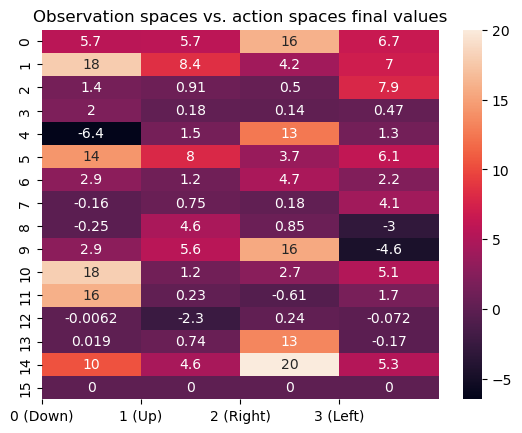

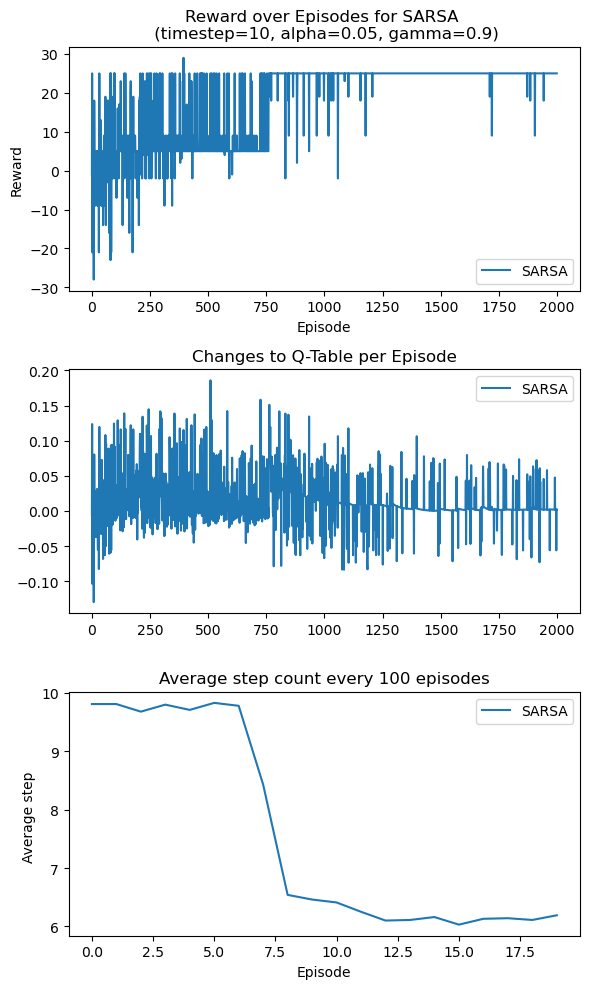

In [19]:
seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward, label='SARSA')
axs[0].set_title(f'Reward over Episodes for SARSA \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss, label='SARSA')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step, label='SARSA')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

**Parameter #2: Value of Gamma**
With an initial gamma value of 0.9, the base SARSA algorithm seems to have deemed the smallest reward on the map, +4 in the corner at [1,3], is not worth the depreciating rewards compared to collecting the +5 reward in the middle of the map and then heading straight to the terminating state. We will adjust the gamma value to 1.0 to see if the agent will now collect all rewards.

In [20]:
#Gamma = 1 (all rewards equal value)

#define parameters
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 1
epsilon = 1
#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[-1.13692621e+00  4.17351765e-01  2.05918907e+00  2.16739328e-01]
 [ 3.34171866e+00  7.30737892e-01  4.08487234e-01  1.78823396e-01]
 [ 1.06994265e+00  1.48582506e-01  2.08948341e-01  5.77884503e-01]
 [ 8.50015453e-01  2.26727185e-01  1.41506811e-01  1.22537474e-01]
 [-6.76376546e+00  5.91465403e-01  2.71523395e+00 -7.25263197e-01]
 [-8.57005862e-01  5.58706182e-01  1.22225882e+00 -1.01299129e+00]
 [ 1.01088778e+00  3.25401603e-01  2.33910712e+00  1.08603254e+00]
 [-1.06235062e+00  2.58256246e-01  2.35629600e-01  1.09990501e+00]
 [-6.85927902e-01  3.10375179e-01 -2.23235392e-01 -4.94727987e+00]
 [ 2.72663435e-01  8.28120569e-01  3.59061148e-01 -5.18229003e+00]
 [ 4.97115803e+00  5.58762070e-01 -1.54448580e+00 -3.67763755e-01]
 [ 1.16375933e+01 -2.81622633e-01 -1.72940459e-01  2.68617325e-01]
 [-2.55527102e-01 -4.50826361e+00  2.49183096e-01 -8.83021823e-01]
 [ 3.65292675e-01 -1.28281993e-01  1.22307848e+00 -3.86159764e-01]
 [ 1.00852291e+0

Episode 1300 / 2000 complete
Current Q-table:
 [[11.84367973 15.74839324 24.8754636  13.72462937]
 [24.88639851 16.1806977  11.44009669 12.74131084]
 [18.00670599  2.29077427  0.81544245  2.62895876]
 [ 3.82575812  0.35802513  0.38331199  0.54929612]
 [-7.83246808  3.48300298 18.91473608  1.79970142]
 [12.57486413 13.86141554 19.93262349 10.93663453]
 [19.99977151 11.69259167 11.74307247 13.86504719]
 [ 1.07690866  0.69630675  0.71980821 13.87438154]
 [ 0.07270443  4.50723175  0.08005975 -5.90449247]
 [ 3.2813716   4.04970284 18.4849908  -6.45635862]
 [19.99997837 14.86597851 10.67399142 10.92874031]
 [19.68620789  1.38125173  2.6624081   4.69545565]
 [-0.2300449  -5.8427302   4.44301746 -0.50664619]
 [ 1.75088008  0.29650562 18.42003727  0.37332911]
 [17.50721003 14.47003916 20.         14.14364612]
 [ 0.          0.          0.          0.        ]] 

Episode 1400 / 2000 complete
Current Q-table:
 [[11.84367973 15.74839324 24.83222808 13.72462937]
 [24.82535381 16.1806977  11.4400966

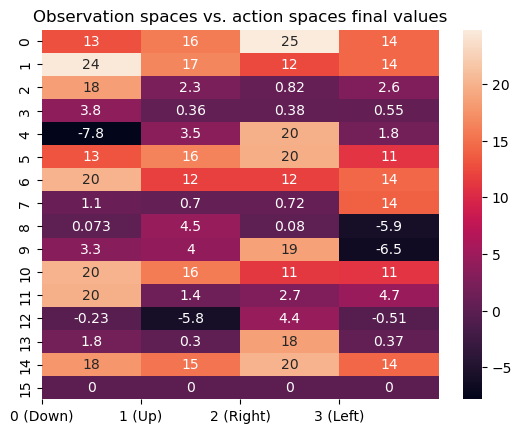

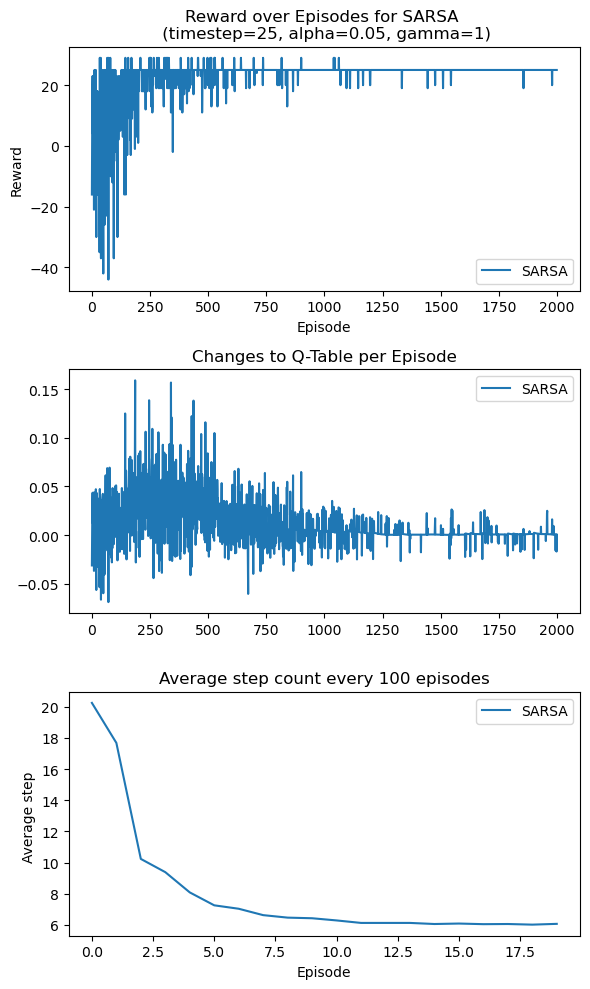

In [21]:
seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward, label='SARSA')
axs[0].set_title(f'Reward over Episodes for SARSA \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss, label='SARSA')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step, label='SARSA')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

In [22]:
#Gamma = 0.7

#define parameters
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 0.7
epsilon = 1
#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[-0.31389543  0.29182919  0.79053612  0.2516232 ]
 [ 2.24879678  0.7855296   0.17156133  0.24038231]
 [ 0.1164097   0.11371183  0.05586835  0.8290315 ]
 [ 0.38595846  0.04790562  0.03169161  0.05884623]
 [-6.9268382   0.27305511  1.90787895  0.13249499]
 [-0.15407171  0.88070559  0.60703985  0.1468225 ]
 [ 0.40810398  0.15902985  1.89565753  0.27374451]
 [-3.00494419  0.05596271 -0.29063338  0.45228384]
 [-0.33393376 -0.32253195 -0.3367848  -5.33804558]
 [ 0.0861309   0.52581706 -0.12649846 -5.00788633]
 [ 3.54184345  0.23354616 -3.05605892 -0.03574534]
 [11.19746663  0.83596683 -1.5669731   0.01559088]
 [-0.58539939 -4.92270279  0.24615826 -0.48555361]
 [ 0.04999166 -0.3621799   1.7684743  -0.41858299]
 [ 1.88619504  0.04289091 13.85286265  0.11892983]
 [ 0.          0.          0.          0.        ]] 

Episode 200 / 2000 complete
Current Q-table:
 [[ 2.07139828e-01  5.25579296e-01  1.15408656e+00  3.74882341e-01]
 [ 2.12064493e+00  1.0

Episode 1300 / 2000 complete
Current Q-table:
 [[ 2.58666415  3.0353244   6.71759615  2.93603095]
 [ 9.56368724  4.14334518  2.50034096  2.85286309]
 [ 1.70880276  0.59478806  0.45300195  5.63752592]
 [ 2.52928076  0.14412567  0.14258655  0.30870733]
 [-7.22264984  0.7249013   5.79326036  0.93964253]
 [ 3.5074024   4.45967157  6.57167395  2.89850938]
 [ 9.74042202  2.61298317  5.40119758  2.62570584]
 [-0.52003567  0.61145451 -0.25303888  4.81329485]
 [-0.22182983 -0.32778368  1.31617937 -6.48505776]
 [ 2.56383242  1.49741134  7.95627618 -6.64020898]
 [13.99992758  3.97750523  4.63904469  3.28510298]
 [19.84697144  1.61223555  1.03125139  1.72049344]
 [-0.53268192 -5.71115873  0.74541717 -0.434065  ]
 [ 1.14640761 -0.11344637 12.34623066 -0.18113716]
 [11.57822468  6.62769861 20.          6.3560566 ]
 [ 0.          0.          0.          0.        ]] 

Episode 1400 / 2000 complete
Current Q-table:
 [[ 2.58666415  3.0353244   6.78573339  2.93603095]
 [ 9.74847913  4.14334518  2.5726373

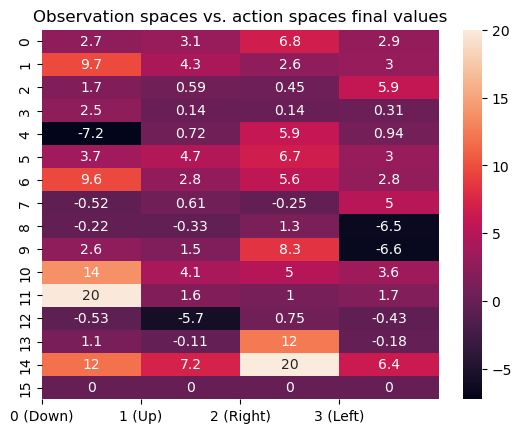

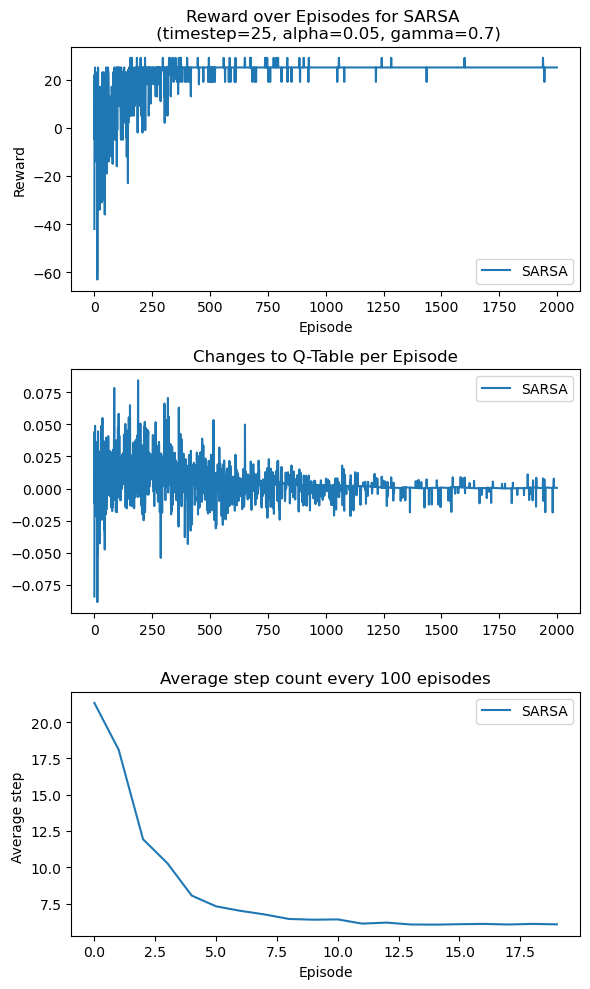

In [24]:
seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward, label='SARSA')
axs[0].set_title(f'Reward over Episodes for SARSA \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss, label='SARSA')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step, label='SARSA')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

In [25]:
#Gamma = 0.5 (extremely discounted rewards)

#define parameters
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 0.5
epsilon = 1
#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[-5.98134703e-01 -2.27936939e-02  3.95780526e-01  7.09549318e-02]
 [ 1.90196098e+00  5.03409690e-01  8.06158293e-02  6.02612148e-02]
 [ 1.96464416e-01  6.76853644e-02  4.09024538e-02  4.95486977e-01]
 [ 1.07247337e+00  4.53764924e-02  6.83966115e-02  2.10339339e-02]
 [-6.97942332e+00 -8.65621582e-03  1.87347401e+00  4.06227190e-02]
 [-2.11365348e-01  3.47498740e-01  3.34015182e-01 -5.87183042e-01]
 [ 2.61850873e-01  4.85409349e-02  2.25781978e+00  4.14297654e-01]
 [-2.64142696e+00  5.42200557e-02 -1.54184663e-01  3.89630472e-01]
 [-1.71310639e-01 -3.09059616e-01 -1.79049449e-01 -5.67005949e+00]
 [ 1.80492871e-01  3.80365261e-01  9.66848014e-02 -4.59063130e+00]
 [ 2.79554433e+00  1.27392301e-01 -1.58654648e+00  3.22436296e-02]
 [ 1.11974666e+01  2.89373191e-01 -1.22106097e+00  3.25429435e-02]
 [-2.99567785e-01 -4.40374189e+00  1.51877913e-01 -2.11935040e-02]
 [ 3.06504076e-02 -1.47592633e-01  2.48085478e+00 -1.55326183e-01]
 [ 1.79305319e+0

Episode 1100 / 2000 complete
Current Q-table:
 [[ 0.97647294  0.82146636  3.07809278  0.937413  ]
 [ 6.15356334  2.174978    0.69591371  0.98448094]
 [ 0.50910314  0.28996914  0.38996034  2.34186835]
 [ 1.94403738  0.27314496  0.15770641  0.08813381]
 [-7.53114298  0.15348386  3.57309825  0.20184947]
 [ 1.24000569  1.68618192  2.36625502  0.99429837]
 [ 4.77079006  0.60074767  3.73814624  0.7059581 ]
 [-0.79296168  0.31490679  0.1128567   1.80459616]
 [-0.20839419 -0.42756565 -0.5193039  -6.67963145]
 [ 4.08068325  0.57031216  0.82920135 -6.37114147]
 [ 9.97337238  1.41523446  1.12695481  1.0839439 ]
 [19.50211439  1.29584505 -0.85130912  1.09932355]
 [-0.17886575 -6.27487861  1.83681997 -0.15053617]
 [ 1.26346229 -0.14859783  9.58199706 -0.17522623]
 [ 7.13889983  3.7137918  20.          3.43265331]
 [ 0.          0.          0.          0.        ]] 

Episode 1200 / 2000 complete
Current Q-table:
 [[ 1.01402894  0.85649029  3.03591094  0.96690123]
 [ 5.9344685   2.174978    0.7205997

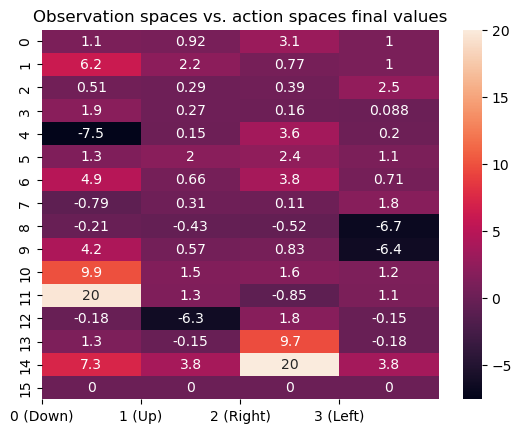

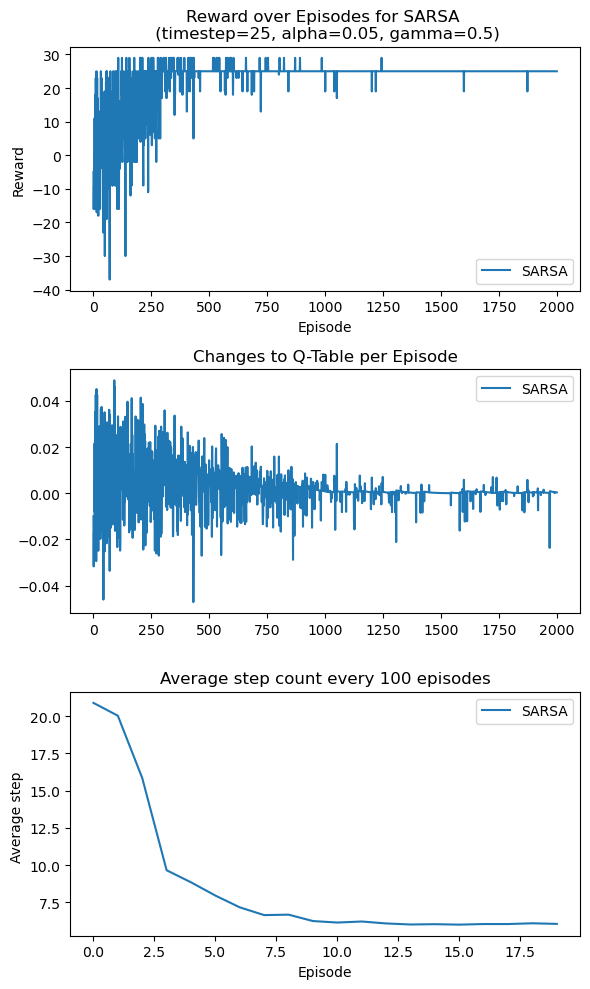

In [26]:
seaborn.heatmap(Q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward, label='SARSA')
axs[0].set_title(f'Reward over Episodes for SARSA \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss, label='SARSA')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step, label='SARSA')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

### PART 3 Step 1: Q-Learning

In [27]:
#Define Q-learning
def Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay):
    
    #define parameters to track reward, loss, average steps for plots
    total_reward =[]
    s_a_loss=[]
    step_count=0
    avg_steps=[]
    step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}


    #Initializing the Q table
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    old_Q = Q
    
    for episode in range(total_episodes):
        ep_reward=0
        step=0
        avg_loss=0
        state = env.reset()
        done=False

        while not done:
            step=step+1
            action = greedyEp(state, Q, epsilon)
            next_state, reward, done, info= env.step(action)

            #Choosing the next action
            next_action = greedyEp(next_state, Q, epsilon)

            #Calculating new Q value at this state-action pair
            prediction = Q[np.where(state==1)[0][0]][action]
            target = reward + gamma * np.max(Q[np.where(next_state==1)[0][0]])
            loss=alpha*(target - prediction)
            avg_loss += loss
            Q[np.where(state==1)[0][0]][action] = (Q[np.where(state==1)[0][0]][action] + loss)
            state = next_state
            action = next_action

            #Tracking reward
            ep_reward = ep_reward + reward

            #Decrease epsilon using negative exponential function
            if epsilon > 0.01:
                epsilon =np.exp(-decay*(episode+1))

        #track data for plots
        step_count += step
        total_reward.append(ep_reward)
        s_a_loss.append(avg_loss/timestep)
        
        #print current Q-table every 100 episodes
        if (episode%100==99):
            avg_steps.append(step_count/100)
            step_count=0
            print("Episode",episode+1,"/",total_episodes,"complete")
            print("Current Q-table:\n", Q,"\n")
    
    #When all episodes are complete
    print("Done!")
    return Q, total_reward, s_a_loss, avg_steps

In [28]:
#define parameters
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running Q-Learning
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 3.71663504  2.19130163  2.28427374  2.28904075]
 [ 3.63850754  1.75432059  0.95156073  1.49588604]
 [ 0.79779293  0.53143203  0.52761448  1.85165061]
 [ 1.49276214  0.35306272  0.34725776  0.47758532]
 [-4.80807627  2.35242279  4.58264809  3.2312011 ]
 [ 1.87993222  2.34943015  1.34130785  3.53727825]
 [ 1.27887186  0.6918682   2.19965036  1.60879353]
 [-0.50928773  0.29067229  0.26873293  1.04842387]
 [ 0.93917744  3.06639615  1.40893622 -3.79824828]
 [ 4.97793295  1.68304734  1.86242342 -4.2148352 ]
 [ 7.31980283  0.37437228 -0.90097695  0.54411159]
 [ 8.62399815  0.53852422 -0.25386837  0.28793258]
 [ 0.56926702 -3.26090758  4.55168239  0.17541223]
 [ 2.96636372  1.43242898 10.86638734  1.03536288]
 [ 5.30876308  1.4057273  16.67833232  3.40683505]
 [ 0.          0.          0.          0.        ]] 

Episode 200 / 2000 complete
Current Q-table:
 [[ 1.08843918e+01  6.57010662e+00  6.02578463e+00  5.86505093e+00]
 [ 1.08059884e+01  4.2

Episode 1100 / 2000 complete
Current Q-table:
 [[15.11204203 13.08750289 13.06217004 13.18845993]
 [15.71583685  8.66345892  3.79157036  6.21544873]
 [ 1.87067303  1.16683439  0.85384736  9.07787006]
 [ 2.26077339  0.66861679  0.4993575   1.04019981]
 [ 5.75888191 13.41758782 16.61715043 14.92665147]
 [14.58       13.10887994 10.82606296 14.57232992]
 [ 5.45600905  3.03543972  4.12307846 12.90241466]
 [ 1.50486062  0.94518318  0.72528724  3.97264358]
 [ 8.53402342 15.11107718  9.84288311  1.30843715]
 [16.2        12.85339561 15.42364431  5.42259158]
 [17.95040887  5.04180131  3.01586599  8.24204314]
 [15.48128918  0.83564573  0.33940346  3.11305106]
 [ 6.82484724  0.38483883 16.09768544  5.93497348]
 [15.98251996 13.96719963 18.         14.04850112]
 [17.29532376 15.04480278 20.         15.28918398]
 [ 0.          0.          0.          0.        ]] 

Episode 1200 / 2000 complete
Current Q-table:
 [[16.12871498 13.15139188 13.11043806 13.18845993]
 [15.71293775  8.66345892  3.7915703

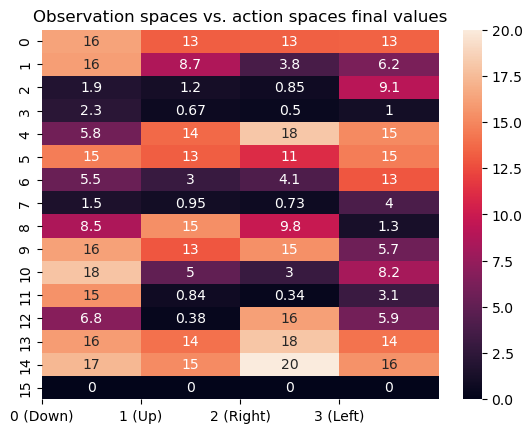

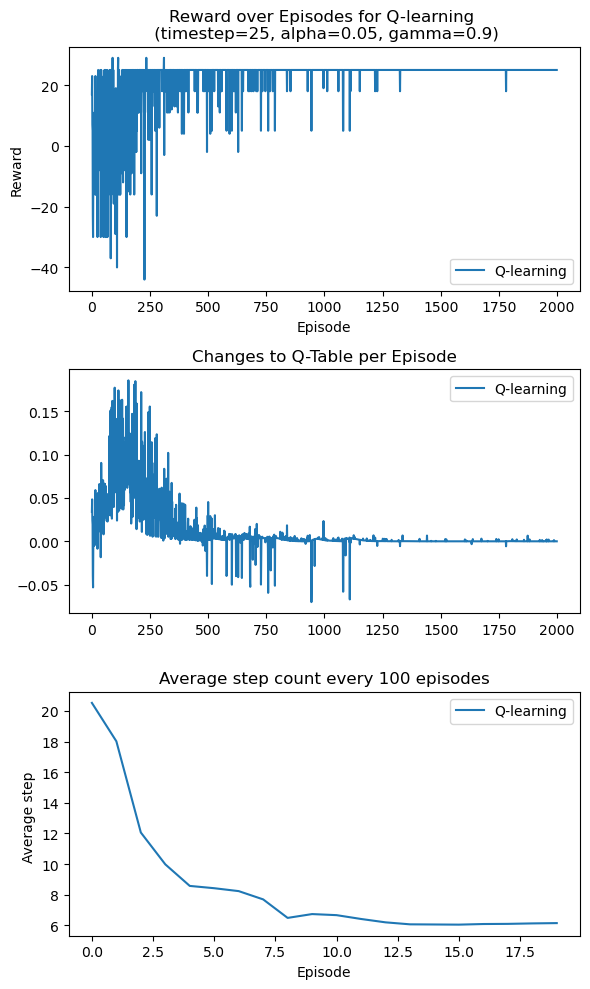

In [29]:
seaborn.heatmap(Q_q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

Done!


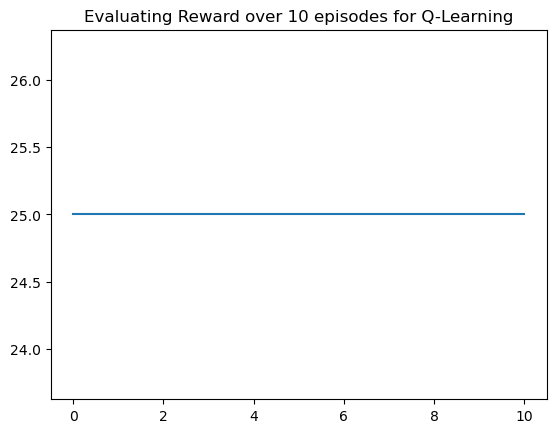

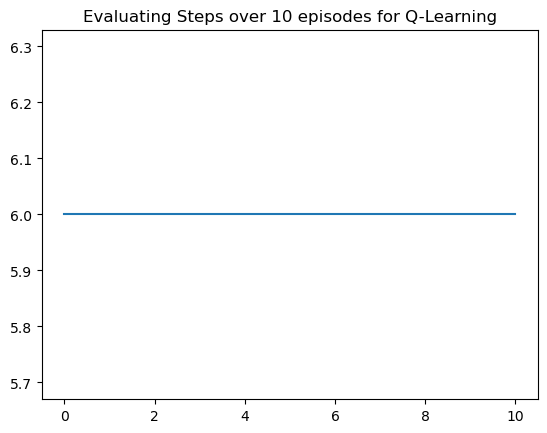

In [30]:
#Evaluate the Q-learning has converged

Qpi = Q_q
timestep=25
total_episodes = 11
epsilon = 0 #ensures greedy action is taken 100% of the time

step_labels={0: "(Down)", 1:"(Up)", 2: "(Right)", 3:"(Left)"}

env = GameEnv(timestep)
env.reset()

reward, steps = evaluate(env, Qpi, timestep, total_episodes, epsilon)

plt.plot(reward)
plt.title(f'Evaluating Reward over 10 episodes for Q-Learning')
plt.show()
plt.plot(steps)
plt.title("Evaluating Steps over 10 episodes for Q-Learning")
plt.show()

## PART 3 Step 2: Tuning Parameters for Q-Learning

**Parameter #1: Number of Max Timesteps**

In [31]:
#Max timesteps: 20 timesteps
timestep=20
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running Q-Learning
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 4.0575505   2.24552598  2.17840997  2.08971974]
 [ 3.47602511  2.08658309  0.7024673   1.75061176]
 [ 0.71708047  0.26321562  0.4242236   1.7043298 ]
 [ 1.42436589  0.22132815  0.2433137   0.16070933]
 [-5.13037406  2.50085829  5.09597018  3.6205547 ]
 [ 1.66298315  2.15093254  1.03996925  3.6906301 ]
 [ 1.57880411  0.37045087  2.07764385  1.07613215]
 [-1.04151055  0.37974781  0.17158144  0.9070963 ]
 [ 0.92278701  2.70367811  0.87352334 -4.34174247]
 [ 3.74436356  1.11235814  1.45853335 -4.10652624]
 [ 6.673533    0.44823577 -0.68841331  0.38516833]
 [ 8.62399815  0.3933335  -1.21480967  0.451238  ]
 [ 0.2681949  -2.89277347  2.37926381  0.70547344]
 [ 1.74037687  1.16109238  7.43100126  0.4652751 ]
 [ 6.3526011   1.12446422 14.72959811  1.42344812]
 [ 0.          0.          0.          0.        ]] 

Episode 200 / 2000 complete
Current Q-table:
 [[ 6.74858332  4.67263454  4.03072955  4.79808004]
 [ 6.06767029  3.1589419   1.48574574 

Episode 1100 / 2000 complete
Current Q-table:
 [[16.27527808 12.66159699 13.24601592 12.93086693]
 [15.94788576  7.06774567  2.66221394  5.6531056 ]
 [ 1.7375025   0.921886    0.65948422  7.6058033 ]
 [ 1.86621804  0.38951397  0.62602744  0.49074613]
 [ 5.99435123 13.62915457 18.11036623 14.90728553]
 [14.58       12.53574739 12.3474787  14.55750772]
 [15.61820897  1.91295617  3.82989583  4.47179392]
 [-0.21997354  0.63563834  0.6704012   3.86042726]
 [ 6.32183712 15.69360891  8.40465253 -1.03518638]
 [16.2        11.90821998 15.19036718  4.98123292]
 [17.99655528  6.76633117  2.86111844  6.89584045]
 [14.72959811  0.71821011 -0.51943185  1.96713649]
 [ 4.54352895 -1.30547522 15.54912822  3.87367175]
 [15.61084144 13.86138311 18.         12.09195712]
 [17.56809458 15.56391244 20.         15.56132724]
 [ 0.          0.          0.          0.        ]] 

Episode 1200 / 2000 complete
Current Q-table:
 [[15.94925284 12.66159699 13.24601592 12.93086693]
 [15.80659147  7.06774567  2.6622139

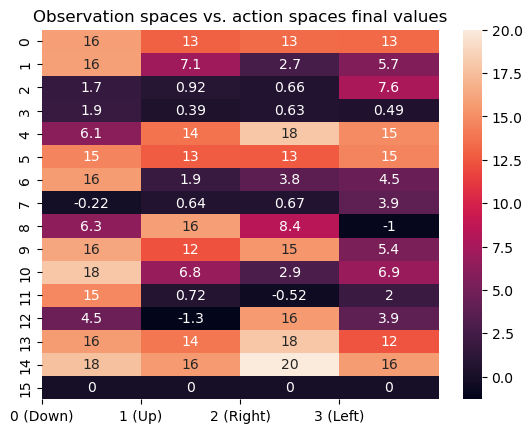

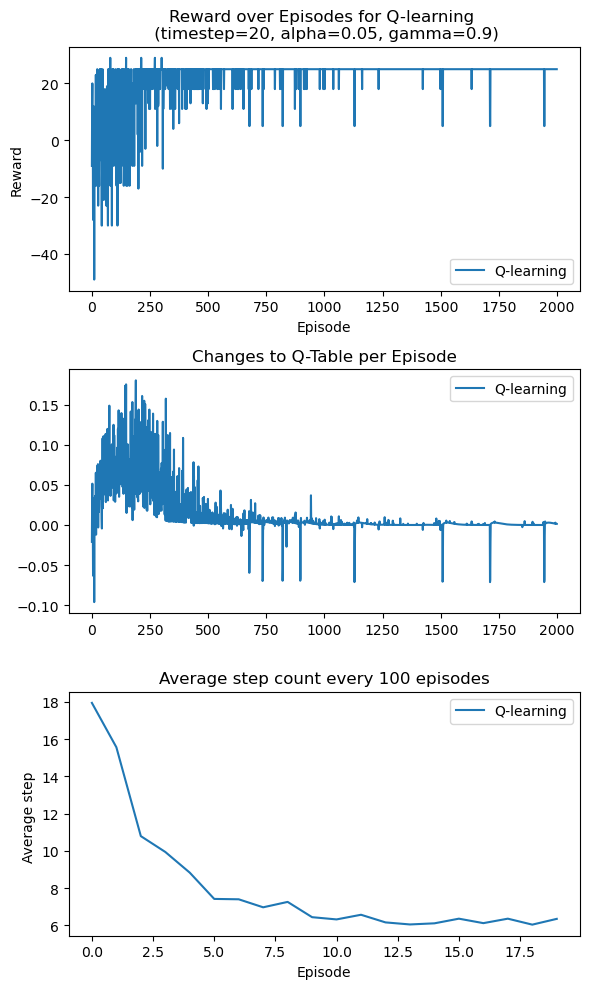

In [32]:
seaborn.heatmap(Q_q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

In [33]:
#Max timesteps: 15 timesteps
timestep=15
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running Q-Learning
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 3.84588979  2.28435349  2.8924112   2.41137178]
 [ 3.91750703  2.33941187  0.36445156  1.79518694]
 [ 0.23848519  0.18538126  0.21522363  1.33370777]
 [ 0.84842594  0.09987996  0.14730256  0.10662814]
 [-5.16595567  2.34532745  4.95980619  3.11995065]
 [ 0.76300925  2.61640168  0.93485161  3.49940551]
 [ 0.28690166  0.19038809  1.80499105  1.01221546]
 [-1.76774449  0.19511076  0.10270396  0.4946605 ]
 [ 0.05760447  2.30984883  0.43217355 -3.253645  ]
 [ 0.40026784  1.74516127  0.51572115 -3.14549739]
 [ 2.16044124  0.40313197 -1.57547265  0.28705114]
 [ 2.8525      0.39116323 -0.72525     0.1298655 ]
 [ 0.0115863  -1.2842699   0.68502427  0.02614575]
 [ 0.10527302  0.17584396  2.39410616  0.07066332]
 [ 1.12073736  0.03425416 10.24650042  0.09919372]
 [ 0.          0.          0.          0.        ]] 

Episode 200 / 2000 complete
Current Q-table:
 [[ 6.64158884  5.10591273  5.04156558  4.73342418]
 [ 7.52060895  4.27388758  1.21891863 

Episode 1200 / 2000 complete
Current Q-table:
 [[ 8.75049961  9.97702902 16.29182465 10.29603632]
 [18.11780251 12.2190221   8.57982503 11.32365363]
 [ 3.18201388  2.49615961  1.15841034 14.15370289]
 [ 3.80719489  0.57036069  0.47908004  0.39884445]
 [-1.17871431  6.21704013 14.19408236  5.96198181]
 [ 7.58338894 11.62763589 14.58        8.46014651]
 [16.2         6.96536727  9.57586545 10.42576232]
 [ 0.52578792  1.21069203  3.61083455 10.66736612]
 [ 1.73419491  6.41885437  2.94663042 -2.04927053]
 [ 3.25578776 11.93522346  3.84683794 -2.37026701]
 [18.         10.11263633  5.93394744  6.51549444]
 [17.7963378   1.30197578 -0.50424087  1.70560825]
 [ 0.45595936 -2.01052551  4.99587752  0.51800104]
 [ 1.74482823  1.73469188 15.2501566   0.72797907]
 [11.17347744 10.66842736 20.          8.63791978]
 [ 0.          0.          0.          0.        ]] 

Episode 1300 / 2000 complete
Current Q-table:
 [[ 8.95170834  9.97702902 16.28377949 10.51465943]
 [18.11551095 12.2190221   8.7922065

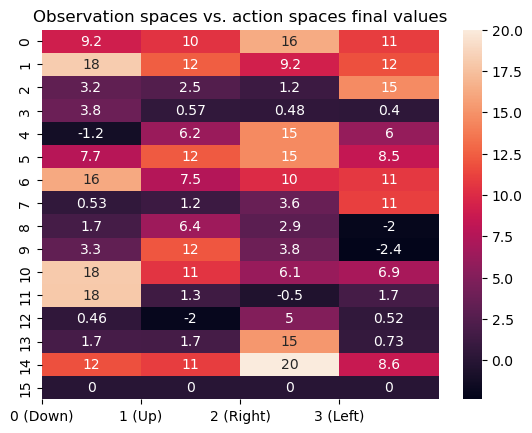

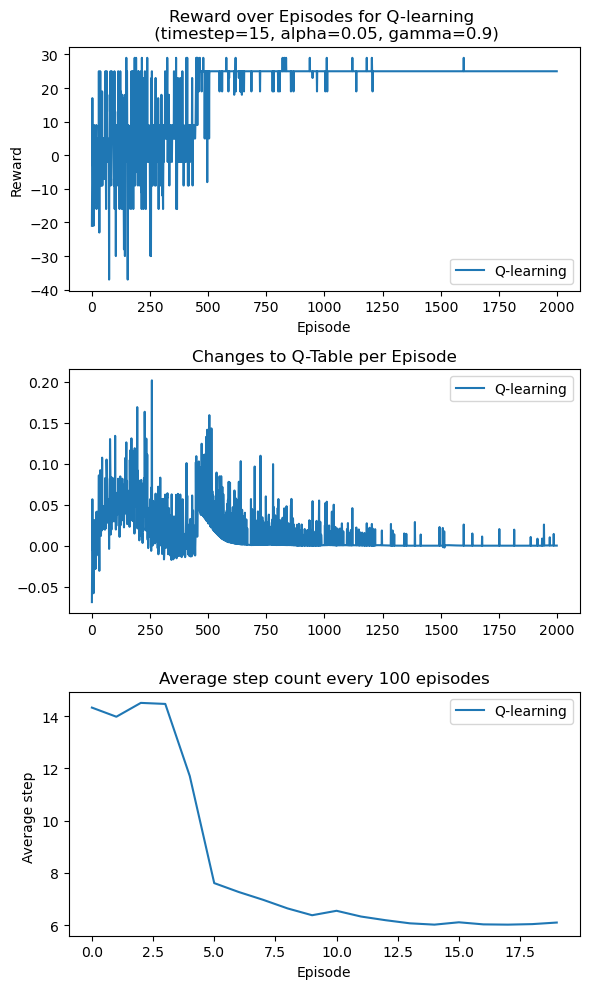

In [34]:
seaborn.heatmap(Q_q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

In [35]:
#Max timesteps: 10 timesteps
timestep=10
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running Q-Learning
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 1.56533155e+00  2.07811170e+00  3.89639933e+00  1.56956609e+00]
 [ 4.90640400e+00  2.45590054e+00  1.31618144e+00  1.75464122e+00]
 [ 2.05160095e-01  4.31755794e-01  1.29863877e-01  2.47216872e+00]
 [ 7.44026714e-01  8.10164818e-02  6.59357888e-02  1.72693200e-01]
 [-5.21254915e+00  1.08520170e+00  3.60839050e+00  1.16653383e+00]
 [ 4.83033484e-01  3.09998700e+00  3.86868524e-01  1.57949181e+00]
 [ 2.92649973e-01  4.72328238e-01  3.91540012e-01  1.12807137e+00]
 [-7.59877500e-01  1.75500000e-02  7.89750000e-04  2.89211334e-02]
 [ 1.05641944e-02  8.29328332e-01  1.40581654e-01 -3.13535685e+00]
 [ 7.91886541e-02  1.11950201e+00  1.63535341e-01 -1.99169825e+00]
 [ 1.63591601e+00  2.35242504e-02 -9.33727500e-01  1.11794420e-01]
 [ 2.85250000e+00  1.90000000e-01 -2.91000000e-01  7.36162205e-02]
 [ 2.38483004e-03 -1.81816168e+00  8.68001081e-02  4.17279714e-03]
 [ 2.71775503e-02  6.25255671e-02  8.96346158e-01  2.01723640e-03]
 [ 5.82501895e-0

Episode 900 / 2000 complete
Current Q-table:
 [[ 5.68060883e+00  5.68603697e+00  5.68022046e+00  5.63149633e+00]
 [ 6.30477170e+00  6.04749766e+00  6.02837383e+00  5.84530831e+00]
 [ 2.49256372e+00  2.85283284e+00  7.35484809e-01  6.22837369e+00]
 [ 2.53900013e+00  1.51244738e-01  1.46358996e-01  4.22982033e-01]
 [-2.34419824e+00  5.42000356e+00  6.08692357e+00  5.88022639e+00]
 [ 5.59533514e+00  5.68698271e+00  5.67697158e+00  5.67696588e+00]
 [ 1.92890115e+00  3.06004742e+00  2.90301846e+00  5.77930726e+00]
 [-9.24748076e-01  2.95411504e-01  1.52921920e-01  2.97580194e+00]
 [ 7.64699834e-02  5.96132671e+00  1.11123257e+00 -3.74906545e+00]
 [ 8.31207128e-01  5.81663163e+00  2.84041317e+00 -2.88509099e+00]
 [ 7.54779211e+00  4.22584857e-01 -9.68045026e-01  2.58193701e-01]
 [ 6.73159137e+00  6.78724492e-01 -3.82713768e-01  7.36162205e-02]
 [ 1.19719347e-02 -2.11341455e+00  5.77234936e-01  2.47273370e-02]
 [ 2.71775503e-02  3.63341536e-01  4.15420313e+00  3.69302979e-02]
 [ 1.39336038e+0

Episode 1700 / 2000 complete
Current Q-table:
 [[ 4.88355597e+00  4.87394210e+00  4.88343281e+00  4.87113042e+00]
 [ 5.38733380e+00  5.25022496e+00  5.24416590e+00  5.13511911e+00]
 [ 2.49256372e+00  2.85283284e+00  7.35484809e-01  5.31704418e+00]
 [ 2.53900013e+00  1.51244738e-01  1.46358996e-01  4.22982033e-01]
 [-2.04673733e+00  5.11008346e+00  5.31111606e+00  5.27173652e+00]
 [ 4.89732012e+00  4.97114434e+00  4.91124004e+00  4.93526409e+00]
 [ 1.92890115e+00  3.06004742e+00  2.90301846e+00  4.92867558e+00]
 [-9.24748076e-01  2.95411504e-01  1.52921920e-01  2.97580194e+00]
 [ 7.64699834e-02  5.69057277e+00  1.11123257e+00 -3.74906545e+00]
 [ 8.31207128e-01  4.94474527e+00  2.84041317e+00 -2.88509099e+00]
 [ 7.54779211e+00  4.22584857e-01 -9.68045026e-01  2.58193701e-01]
 [ 6.73159137e+00  6.78724492e-01 -3.82713768e-01  7.36162205e-02]
 [ 1.19719347e-02 -2.11341455e+00  5.77234936e-01  2.47273370e-02]
 [ 2.71775503e-02  3.63341536e-01  4.15420313e+00  3.69302979e-02]
 [ 1.39336038e+

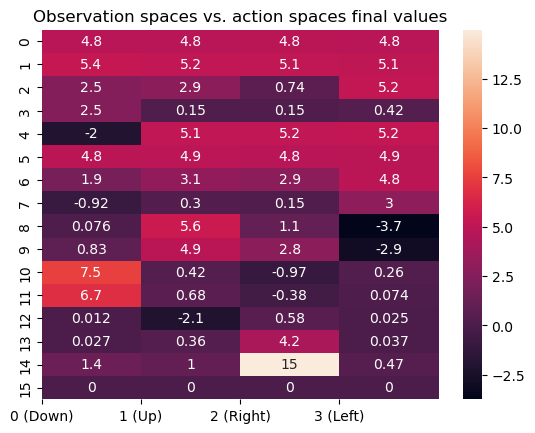

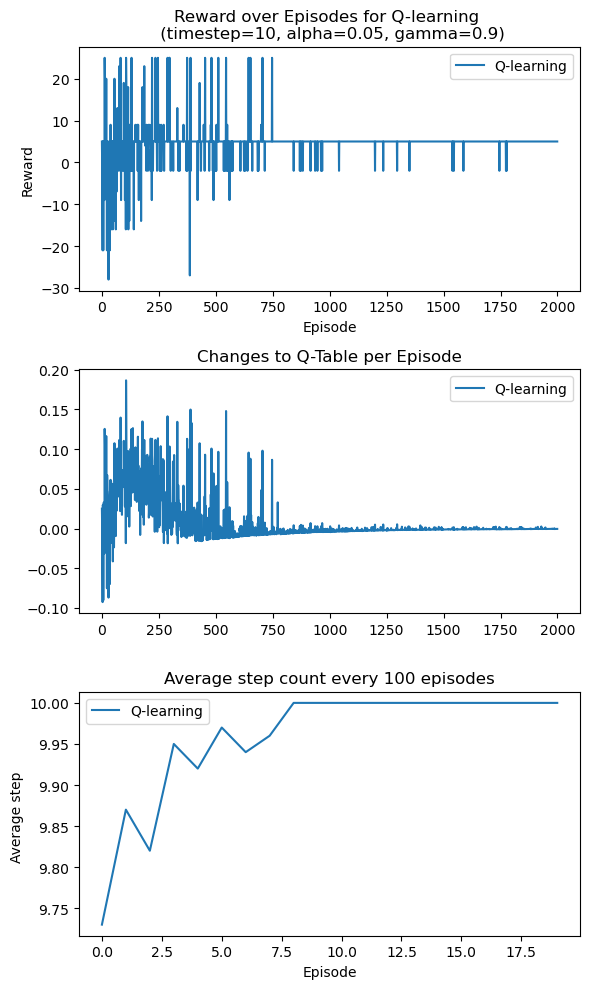

In [36]:
seaborn.heatmap(Q_q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

**Parameter #2: Value of Gamma**

In [37]:
#Value of Gamma: 1.0
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 1
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running Q-Learning
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 3.53739918  3.73573526  5.48251646  4.0632527 ]
 [ 5.90245479  4.94308283  2.948585    4.02871515]
 [ 1.65070878  1.55814812  0.85838666  4.13604939]
 [ 1.57615842  0.94886463  0.86770476  0.90932266]
 [-4.94710524  2.65274143  5.21323994  1.98425727]
 [ 1.6863988   5.05528215  1.61825181  3.30389104]
 [ 3.36970521  1.40710009  2.70474175  2.28252036]
 [ 0.52017687  1.19636388  0.62164278  0.71310568]
 [ 0.56041249  3.1466481   0.67822165 -4.73631039]
 [ 2.08670026  2.8661847   1.76722533 -4.16618435]
 [ 7.3215289   0.6941043  -0.62024561  0.61188873]
 [10.7341754   0.58503331  0.49847563  0.44993133]
 [ 0.33421247 -3.74741663  1.83799522  0.264426  ]
 [ 1.51942299  0.467398    7.22203717  0.37924989]
 [ 4.08057464  1.44664469 14.16021951  1.81412871]
 [ 0.          0.          0.          0.        ]] 

Episode 200 / 2000 complete
Current Q-table:
 [[ 9.04754203  9.65331567 13.4996041   9.48109108]
 [14.26580915 12.02670774  9.69627671 

Episode 1100 / 2000 complete
Current Q-table:
 [[ 52.34910609  63.47140086 117.29637671  59.9266697 ]
 [119.52325965 100.60298701  90.35868512 104.63580984]
 [ 18.58070219  27.87515004  12.62395455 103.54075095]
 [  3.28671135   3.75289235   2.96490847  26.82002802]
 [  7.58120293  27.55759475 100.66978878  24.55826492]
 [ 83.67758327 119.41273844  87.47315134  87.92983024]
 [ 19.99217425  24.38658125  10.91044139 102.61444089]
 [  3.70533089   4.11568747   1.81772302  17.56241502]
 [  1.34205886  35.08612132   4.53044421  -1.38420794]
 [ 12.36649505  96.55149307  13.64423346   5.65200475]
 [ 19.99791162  13.31228481   7.12408727  16.96673348]
 [ 17.90652091   1.85843366   1.71249449   1.51532452]
 [  0.40940161  -3.63449688   6.15633248   0.264426  ]
 [  7.10090396   3.16732005  18.6864218    0.88915805]
 [ 14.3368191   10.44477695  19.99981526  11.71334199]
 [  0.           0.           0.           0.        ]] 

Episode 1200 / 2000 complete
Current Q-table:
 [[ 54.76514022  63.4714

Episode 2000 / 2000 complete
Current Q-table:
 [[ 68.49360242  80.26337344 231.75198534  76.03591334]
 [234.25020331 174.55441358 136.69861419 179.74993024]
 [ 18.58070219  27.87515004  12.62395455 178.41078603]
 [  3.28671135   3.75289235   2.96490847  26.82002802]
 [  7.58120293  27.55759475 173.89176789  29.09585628]
 [124.99921974 234.14000699 127.72783963 129.16465942]
 [ 19.99217425  24.38658125  10.91044139 159.7710809 ]
 [  3.70533089   4.11568747   1.81772302  17.56241502]
 [  1.34205886  35.08612132   4.53044421  -1.38420794]
 [ 12.36649505 165.97951322  13.64423346   5.65200475]
 [ 19.99791162  13.31228481   7.12408727  16.96673348]
 [ 17.90652091   1.85843366   1.71249449   1.51532452]
 [  0.40940161  -3.63449688   6.15633248   0.264426  ]
 [  7.10090396   3.16732005  18.6864218    0.88915805]
 [ 14.3368191   10.44477695  19.99981526  11.71334199]
 [  0.           0.           0.           0.        ]] 

Done!


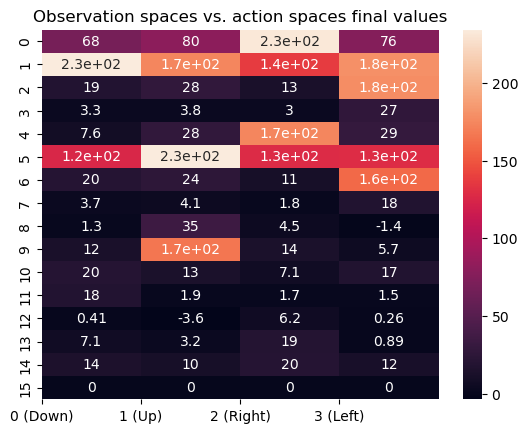

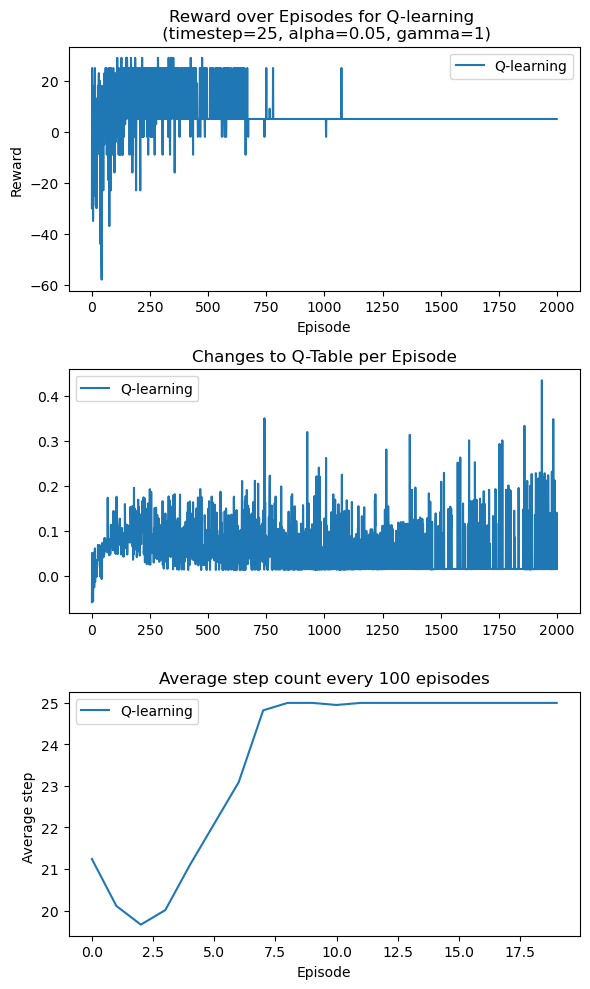

In [38]:
seaborn.heatmap(Q_q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

In [39]:
#Value of Gamma: 0.7
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 0.7
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running Q-Learning
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 1.56486407  0.98804331  1.86736254  0.9958586 ]
 [ 2.90308334  1.1911939   0.2299903   0.76905798]
 [ 0.52743213  0.14988997  0.74520221  0.91981205]
 [ 1.76495953  0.6309337   0.58982738  0.20610251]
 [-6.0317471   1.04401569  2.43135259  1.55874011]
 [ 0.52481586  1.68347364  1.47420719  1.62191859]
 [ 0.4949409   0.13754667  2.59217027  1.1850992 ]
 [-0.27859142  0.69856876  0.17028371  1.12952647]
 [ 0.23266148  1.52622367  0.35440615 -4.99020134]
 [ 0.7634392   0.95222116  0.35321681 -4.6892566 ]
 [ 2.6287652   0.68398492 -0.16162156  0.18730723]
 [12.83028155  0.33370768 -0.33664367  0.16618688]
 [ 0.07467694 -4.75972945  0.95990863  0.09394281]
 [ 0.39050359  0.21966588  3.52713613  0.17090255]
 [ 1.38664938  0.06363211 13.18876747  0.29265282]
 [ 0.          0.          0.          0.        ]] 

Episode 200 / 2000 complete
Current Q-table:
 [[ 1.99466044  1.46089641  2.58437261  1.40058622]
 [ 4.79991109  2.19619268  1.29502294 

Episode 1200 / 2000 complete
Current Q-table:
 [[ 4.34117099  4.29373267  6.83370485  4.23998274]
 [ 9.78916796  5.90502797  4.09624517  4.06451949]
 [ 6.78696793  1.75643329  1.83218425  3.77789107]
 [ 4.19981755  1.14262232  0.96540141  0.92447788]
 [-5.54539854  2.53569808  6.91381235  2.96960389]
 [ 5.72687612  6.20145582  6.86        4.44584549]
 [ 9.8         4.15471673  8.13833228  4.64837481]
 [ 7.43088334  1.6342377   1.78507153  2.67891953]
 [ 0.70073945  3.40295174  0.93829279 -5.25809245]
 [ 9.62892407  2.65716176  2.45087046 -5.24561085]
 [14.          6.32029831  7.2025845   5.3965287 ]
 [19.96360569  1.40028408  3.49931913  4.59707097]
 [ 0.10453989 -4.86920651  5.32539734  0.4010588 ]
 [ 6.64031626  2.97228416 13.98934973  1.57155606]
 [12.97098615  9.30844966 20.          8.9713448 ]
 [ 0.          0.          0.          0.        ]] 

Episode 1300 / 2000 complete
Current Q-table:
 [[ 4.34117099  4.29373267  6.86095112  4.23998274]
 [ 9.80192003  5.95248076  4.1289767

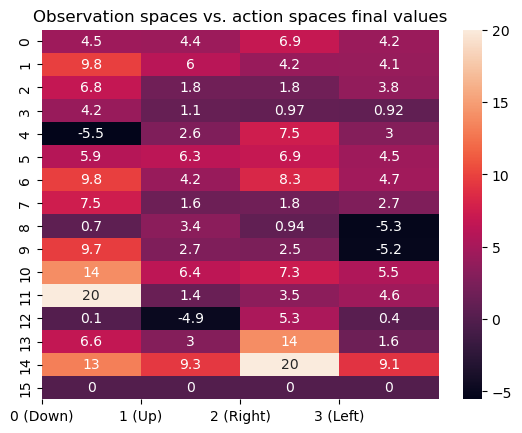

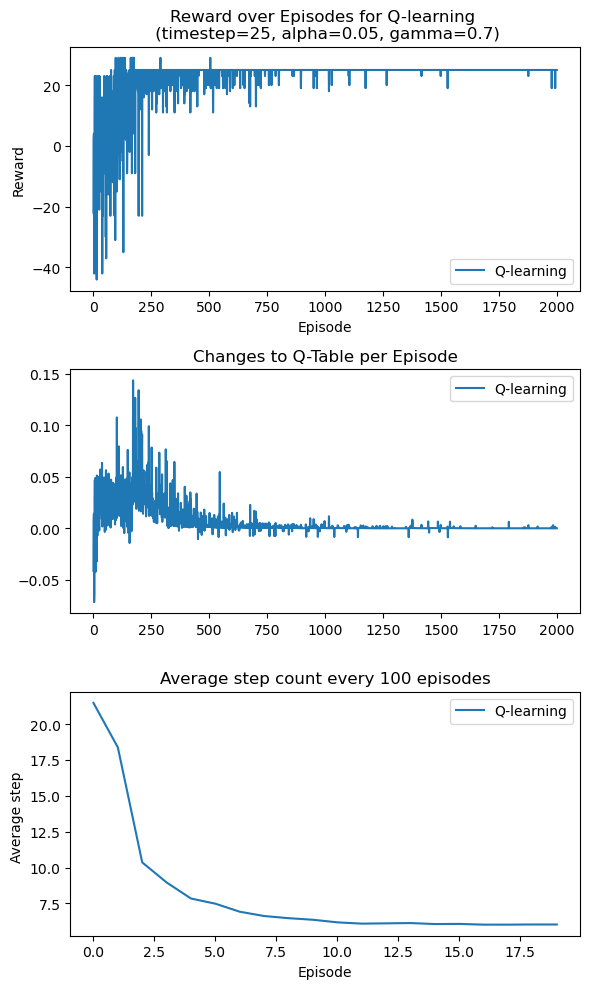

In [40]:
seaborn.heatmap(Q_q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

In [41]:
#Value of Gamma: 0.5
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 0.5
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#get results from running Q-Learning
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[ 0.97081599  0.50356503  1.37542268  0.51099099]
 [ 3.10035282  1.02012142  0.29371218  0.417841  ]
 [ 0.94000896  0.22003447  0.31249776  0.62049167]
 [ 1.35095705  0.33707495  0.23220381  0.13674585]
 [-6.24893221  0.47344119  1.9428016   0.92061269]
 [ 0.35865774  1.23722177  1.05434973  0.98129649]
 [ 0.59366442  0.23225684  2.55831722  1.45057281]
 [-1.41448627  0.30650159  0.11084946  0.90075355]
 [ 0.07407253  0.84086202  0.29580676 -5.43780343]
 [ 0.39822085  0.79156533  0.17005939 -5.39494294]
 [ 3.1682767   0.31169976 -1.22439007  0.17001974]
 [12.05571363  0.57132725 -0.63088725  0.14559009]
 [ 0.04229815 -3.433541    0.48977346  0.04050861]
 [ 0.31683757  0.19864038  3.35157915  0.03738936]
 [ 2.78352812  0.34453006 13.18876747  0.50481037]
 [ 0.          0.          0.          0.        ]] 

Episode 200 / 2000 complete
Current Q-table:
 [[ 1.0559255   0.61753363  1.28623931  0.61231362]
 [ 3.01607468  1.21850821  0.58174699 

Episode 1100 / 2000 complete
Current Q-table:
 [[ 2.0207453   1.42635359  3.24845105  1.41523249]
 [ 6.49867404  2.88791605  1.20227653  1.37064499]
 [ 2.86785377  0.69942912  0.85746937  1.61899624]
 [ 2.36533016  0.7834851   0.65695015  0.46150295]
 [-6.43915928  0.82253366  3.88808576  1.39619794]
 [ 1.83397656  2.82143749  2.99924911  1.97079619]
 [ 4.71913361  1.19266573  5.99979008  1.535519  ]
 [ 4.          1.17155196  1.86981419  2.62737715]
 [ 0.23152345  1.22413289  0.55502156 -5.86831979]
 [ 1.43823488  1.17730706  4.68350162 -5.89101348]
 [ 9.98287392  1.56007237  1.9615659   1.13630574]
 [20.          1.77381016  3.61175747  4.47849855]
 [ 0.17357539 -3.73916214  1.77781597  0.14255199]
 [ 0.99197278  0.34001083  8.3320693   0.26119161]
 [ 7.59202049  3.41523252 19.99481761  2.48572678]
 [ 0.          0.          0.          0.        ]] 

Episode 1200 / 2000 complete
Current Q-table:
 [[ 2.0207453   1.42635359  3.20106258  1.41523249]
 [ 6.43286538  2.88791605  1.2138590

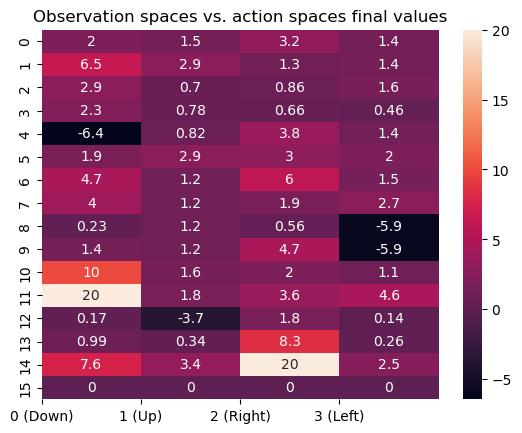

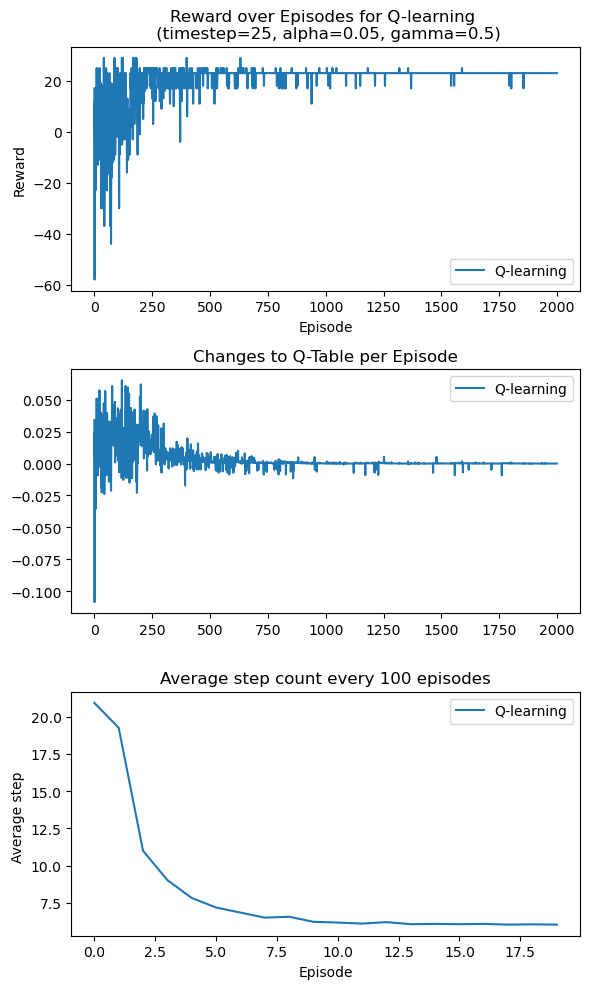

In [42]:
seaborn.heatmap(Q_q, annot=True)
plt.title("Observation spaces vs. action spaces final values")
plt.xticks([0,1,2,3],['0 (Down)', '1 (Up)', '2 (Right)', '3 (Left)'])
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

axs[0].plot(reward_q, label='Q-learning')
axs[0].set_title(f'Reward over Episodes for Q-learning \n (timestep={timestep}, alpha={alpha}, gamma={gamma})')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

axs[1].plot(loss_q, label='Q-learning')
axs[1].set_title('Changes to Q-Table per Episode')
axs[1].legend()

axs[2].plot(avg_step_q, label='Q-learning')
axs[2].set_title("Average step count every 100 episodes")
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Average step ')
axs[2].legend()


plt.tight_layout()
plt.show()

## Comparing SARSA and Q-Learning Results

In [45]:
#Comparing SARSA and Q-Learning
timestep=25
total_episodes = 2000
alpha = 0.05
gamma = 0.9
epsilon = 1

#decay: find factor to insert in exponential such that epsilon=0.01 after 75% of episodes are completed
#reminaing 25% of episodes to prove convergence
decay=-np.log(0.01)/(total_episodes*0.75)

#define new environment
env = GameEnv(timestep)
env.reset()

#SARSA
Q, reward, loss, avg_step = SARSA(env, timestep, total_episodes, alpha, gamma, epsilon, decay)


#Q-Learning
env.reset()
Q_q, reward_q, loss_q, avg_step_q = Q_learning(env, timestep, total_episodes, alpha, gamma, epsilon, decay)

Episode 100 / 2000 complete
Current Q-table:
 [[-0.42804558  0.59428647  1.18017836  0.20783484]
 [ 1.99241398  0.79795048  0.28508245  0.38716699]
 [ 0.38180172  0.21223945  0.44679843  0.75211747]
 [ 1.62810911  0.42999384  0.19794551  0.1318434 ]
 [-6.66061618  0.36664565  3.0153395   0.28070083]
 [-0.90946998  0.95138826  0.72235493  0.02836412]
 [-0.36701801  0.17070288  2.39174785  0.49918471]
 [-2.07965482  0.24384049 -0.0479654   0.73691186]
 [-0.0547309  -0.11549105 -0.26269005 -5.34671386]
 [ 0.14364062  0.53521688 -0.1664485  -5.06326739]
 [ 1.85996145  0.41965185 -3.00017092 -0.28703557]
 [14.16021951  0.33547916 -0.60042263 -0.07681145]
 [-0.07822241 -3.95927055  0.23714009 -0.48598839]
 [ 0.14209926 -0.60637803  2.03310263 -0.30820587]
 [ 1.34809467 -0.08787576 13.85286265 -0.07384289]
 [ 0.          0.          0.          0.        ]] 

Episode 200 / 2000 complete
Current Q-table:
 [[ 0.32797039  0.78869169  1.9110512   1.01145228]
 [ 3.03499162  1.7298883   1.08804704 

Episode 1000 / 2000 complete
Current Q-table:
 [[ 6.66816661e+00  8.20062648e+00  1.49865709e+01  8.36160202e+00]
 [ 1.71989221e+01  8.54202830e+00  4.05906560e+00  8.46383473e+00]
 [ 4.02030545e+00  9.59204908e-01  1.30798281e+00  9.99123758e+00]
 [ 3.66271453e+00  7.94566980e-01  3.50837781e-01  7.65711957e-01]
 [-7.57457570e+00  2.52627760e+00  1.21788669e+01  1.79406628e+00]
 [ 6.73843450e+00  9.67315528e+00  1.36407714e+01  7.62127162e+00]
 [ 1.53160660e+01  5.25894612e+00  9.00900723e+00  7.43550959e+00]
 [ 1.25078914e+00  1.09218414e+00  8.08861890e-01  1.05071113e+01]
 [-6.28960785e-01 -1.47499814e-02  2.33418578e+00 -5.57614619e+00]
 [ 1.24966978e+01  2.13235838e+00  5.39259933e+00 -6.51708902e+00]
 [ 1.76364919e+01  8.12303338e+00  6.50467841e+00  6.13695735e+00]
 [ 1.95944691e+01  2.46951114e+00 -5.72133980e-01  1.25893296e+00]
 [-8.57877959e-02 -5.78678757e+00  3.84752231e+00 -3.20906966e-01]
 [ 4.02404062e+00  2.45597498e+00  1.63803238e+01  5.46520188e-01]
 [ 1.43756433e+

Episode 1800 / 2000 complete
Current Q-table:
 [[ 7.31663277e+00  9.50349081e+00  1.62421284e+01  8.36160202e+00]
 [ 1.80355366e+01  9.22764564e+00  4.85805691e+00  9.20540927e+00]
 [ 4.02030545e+00  9.59204908e-01  1.30798281e+00  1.15742673e+01]
 [ 3.66271453e+00  7.94566980e-01  3.50837781e-01  7.65711957e-01]
 [-7.57457570e+00  2.52627760e+00  1.30020410e+01  1.79406628e+00]
 [ 7.60921535e+00  1.08025104e+01  1.45794474e+01  8.11176974e+00]
 [ 1.61999832e+01  5.87485105e+00  9.00900723e+00  8.34239199e+00]
 [ 1.25078914e+00  1.09218414e+00  8.08861890e-01  1.05071113e+01]
 [-6.28960785e-01 -1.47499814e-02  2.33418578e+00 -5.57614619e+00]
 [ 1.23707734e+01  2.13235838e+00  5.91927073e+00 -6.51708902e+00]
 [ 1.80000000e+01  8.56244739e+00  7.87570979e+00  6.62769961e+00]
 [ 1.97018975e+01  2.46951114e+00 -5.72133980e-01  1.25893296e+00]
 [-8.57877959e-02 -5.78678757e+00  3.84752231e+00 -3.20906966e-01]
 [ 4.02404062e+00  2.45597498e+00  1.70302400e+01  5.46520188e-01]
 [ 1.50479388e+

Episode 800 / 2000 complete
Current Q-table:
 [[11.69182126 12.29601646 16.02118235 12.032095  ]
 [17.84592768 14.06482106 11.91922597 12.81661246]
 [ 6.99273283  4.63461086  3.25071658 15.52977703]
 [ 6.46408041  1.66748871  1.71750696  2.71565026]
 [-3.1401822   5.34936588 15.82421712  6.11796933]
 [10.90747604 14.18562505 14.58       10.85049696]
 [16.2        10.35433856 12.14191683 11.24825716]
 [ 5.91946066  3.06645181  2.43788638 12.78963167]
 [ 0.7182782   6.96821456  2.67780001 -4.28357782]
 [ 7.07245157  6.49032636 15.69131353 -3.3179862 ]
 [18.         13.56943896 10.17882879 10.56112856]
 [19.59446906  2.81374847  3.47888942  5.17286592]
 [ 0.13688613 -3.15045307  5.25175312  0.21885323]
 [ 2.01665649  3.71373343 17.20946871  0.85965155]
 [16.56874727 14.97074571 20.         12.96521265]
 [ 0.          0.          0.          0.        ]] 

Episode 900 / 2000 complete
Current Q-table:
 [[11.69182126 12.60519628 16.13283145 12.47842079]
 [17.7703839  14.428664   11.91922597 

Episode 1800 / 2000 complete
Current Q-table:
 [[12.01650994 12.88663685 15.30535477 12.80812842]
 [16.56805826 14.90249823 12.40814277 13.4838603 ]
 [ 6.99273283  4.63461086  3.25071658 15.74379599]
 [ 6.46408041  1.66748871  1.71750696  2.71565026]
 [-3.01960343  5.76243112 15.45677921  6.11796933]
 [11.78524332 14.56283795 14.58       11.82644219]
 [16.2        11.3360251  13.50225992 12.0562149 ]
 [ 5.91946066  3.06645181  2.43788638 13.45162141]
 [ 0.7182782   7.32581361  2.67780001 -4.28357782]
 [ 7.07245157  6.82191004 15.87940065 -3.3179862 ]
 [18.         13.79804713 10.57654794 11.2317403 ]
 [19.70189749  2.81374847  3.47888942  5.17286592]
 [ 0.13688613 -3.15045307  5.25175312  0.21885323]
 [ 2.01665649  3.71373343 17.41888686  0.85965155]
 [16.70829441 15.38448759 20.         13.65697558]
 [ 0.          0.          0.          0.        ]] 

Episode 1900 / 2000 complete
Current Q-table:
 [[12.01650994 12.88663685 15.88549319 12.85734972]
 [17.9802463  14.91786423 12.4962064

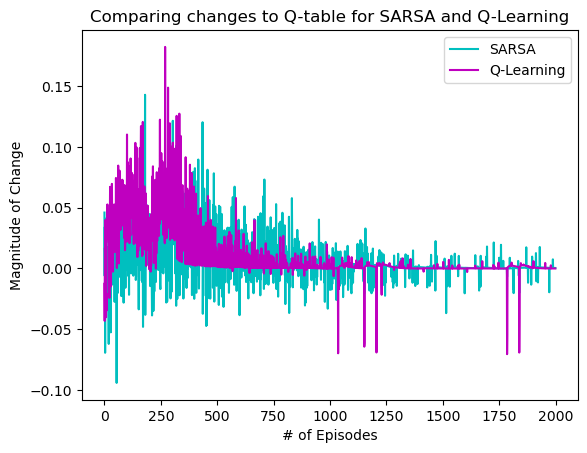

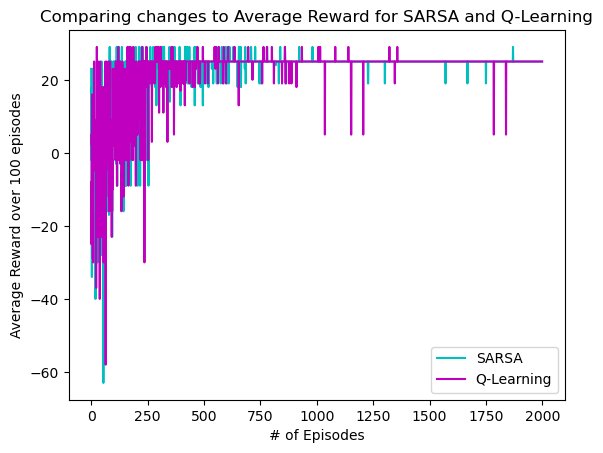

In [46]:
#plotting comparisons
plt.plot(loss, color='c', label='SARSA')
plt.plot(loss_q, color='m', label='Q-Learning')
  
plt.xlabel("# of Episodes")
plt.ylabel("Magnitude of Change")
plt.title("Comparing changes to Q-table for SARSA and Q-Learning")
plt.legend()
plt.show()

plt.plot(reward, color='c', label='SARSA')
plt.plot(reward_q, color='m', label='Q-Learning')
  
plt.xlabel("# of Episodes")
plt.ylabel("Average Reward over 100 episodes")
plt.title("Comparing changes to Average Reward for SARSA and Q-Learning")
plt.legend()
plt.show()


References
1. RL textbook: http://incompleteideas.net/book/RLbook2020.pdf
2. Random Agent class demo
3. Q-learning vs SARSA (reference only): https://towardsdatascience.com/q-learning-and-sasar-with-python-3775f86bd178
4. Matplotlib documentation: https://matplotlib.org/stable/index.html

